___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright by Pierian Data Inc.</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Capstone Project
## Overview

If you are planning on going out to see a movie, how well can you trust online reviews and ratings? *Especially* if the same company showing the rating *also* makes money by selling movie tickets. Do they have a bias towards rating movies higher than they should be rated?

### Goal:

**Your goal is to complete the tasks below based off the 538 article and see if you reach a similar conclusion. You will need to use your pandas and visualization skills to determine if Fandango's ratings in 2015 had a bias towards rating movies better to sell more tickets.**

---
---

**Complete the tasks written in bold.**

---
----

## Part One: Understanding the Background and Data


**TASK: Read this article: [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/)**

----

**TASK: After reading the article, read these two tables giving an overview of the two .csv files we will be working with:**

### The Data

This is the data behind the story [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/) openly available on 538's github: https://github.com/fivethirtyeight/data. There are two csv files, one with Fandango Stars and Displayed Ratings, and the other with aggregate data for movie ratings from other sites, like Metacritic,IMDB, and Rotten Tomatoes.

#### all_sites_scores.csv

-----

`all_sites_scores.csv` contains every film that has a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score, and at least 30 fan reviews on Fandango. The data from Fandango was pulled on Aug. 24, 2015.

Column | Definition
--- | -----------
FILM | The film in question
RottenTomatoes | The Rotten Tomatoes Tomatometer score  for the film
RottenTomatoes_User | The Rotten Tomatoes user score for the film
Metacritic | The Metacritic critic score for the film
Metacritic_User | The Metacritic user score for the film
IMDB | The IMDb user score for the film
Metacritic_user_vote_count | The number of user votes the film had on Metacritic
IMDB_user_vote_count | The number of user votes the film had on IMDb

----
----

#### fandango_scape.csv

`fandango_scrape.csv` contains every film 538 pulled from Fandango.

Column | Definiton
--- | ---------
FILM | The movie
STARS | Number of stars presented on Fandango.com
RATING |  The Fandango ratingValue for the film, as pulled from the HTML of each page. This is the actual average score the movie obtained.
VOTES | number of people who had reviewed the film at the time we pulled it.

----

**TASK: Import any libraries you think you will use:**

In [30]:
# IMPORT HERE!
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import numpy as np
# import warnings
# warnings.filterwarnings('ignore')
# import plotly.express as px
# import plotly.graph_objects as go
# import  plotly.figure_factory as ff
# import plotly.io as pio
# pio.templates.default = "plotly_white"
# import plotly.offline as py
# import plotly.express as px
# from plotly.subplots import make_subplots

## Part Two: Exploring Fandango Displayed Scores versus True User Ratings

Let's first explore the Fandango ratings to see if our analysis agrees with the article's conclusion.

**TASK: Run the cell below to read in the fandango_scrape.csv file**

In [108]:
  fandango = pd.read_csv("fandango_scrape.csv")

**TASK: Explore the DataFrame Properties and Head.**

In [4]:
# prompt: print the head of the csv file

fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [5]:
fandango.info


<bound method DataFrame.info of                                      FILM  STARS  RATING  VOTES
0             Fifty Shades of Grey (2015)    4.0     3.9  34846
1                   Jurassic World (2015)    4.5     4.5  34390
2                  American Sniper (2015)    5.0     4.8  34085
3                        Furious 7 (2015)    5.0     4.8  33538
4                       Inside Out (2015)    4.5     4.5  15749
..                                    ...    ...     ...    ...
499                      Valiyavan (2015)    0.0     0.0      0
500            WWE SummerSlam 2015 (2015)    0.0     0.0      0
501       Yagavarayinum Naa Kaakka (2015)    0.0     0.0      0
502  Yesterday, Today and Tomorrow (1964)    0.0     0.0      0
503                         Zarafa (2012)    0.0     0.0      0

[504 rows x 4 columns]>

In [4]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


**TASK: Let's explore the relationship between popularity of a film and its rating. Create a scatterplot showing the relationship between rating and votes. Feel free to edit visual styling to your preference.**

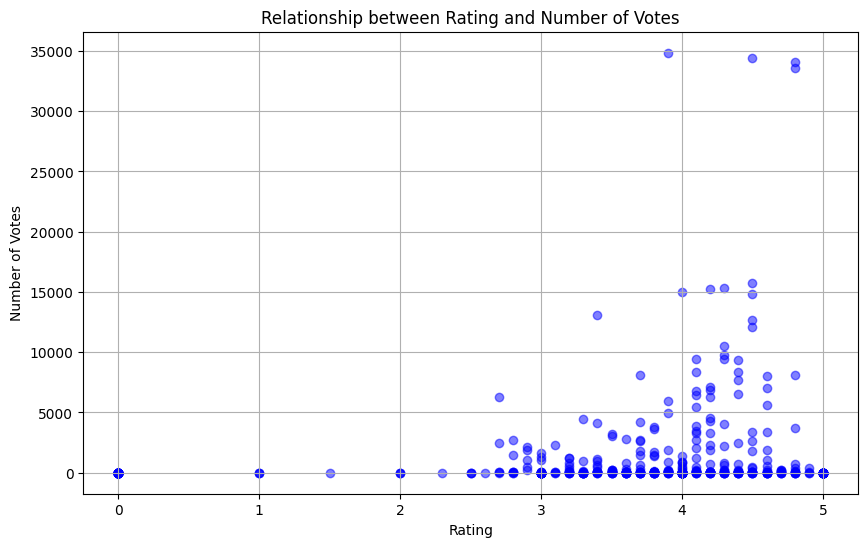

In [7]:
# CODE HERE
plt.figure(figsize=(10, 6))
plt.scatter(fandango['RATING'], fandango['VOTES'], alpha=0.5, color='b')
plt.title('Relationship between Rating and Number of Votes')
plt.xlabel('Rating')
plt.ylabel('Number of Votes')
plt.grid(True)
plt.show()

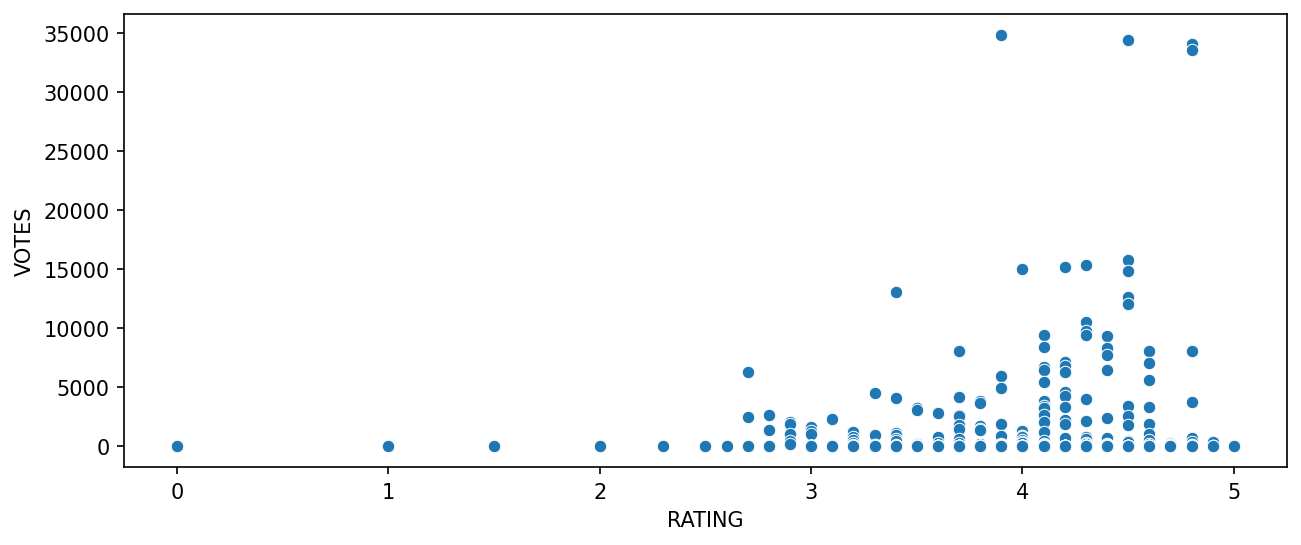

**TASK: Calculate the correlation between the columns:**

In [11]:
# CODE HERE
correlation_matrix = fandango[['STARS', 'RATING', 'VOTES']].corr()

# Display the correlation matrix
print(correlation_matrix)

           STARS    RATING     VOTES
STARS   1.000000  0.994696  0.164218
RATING  0.994696  1.000000  0.163764
VOTES   0.164218  0.163764  1.000000


,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


**TASK: Assuming that every row in the FILM title column has the same format:**

    Film Title Name (Year)
    
**Create a new column that is able to strip the year from the title strings and set this new column as YEAR**

In [21]:
# CODE HERE
fandango['YEAR'] = fandango['FILM'].str.extract(r'\((\d{4})\)')


**TASK: How many movies are in the Fandango DataFrame per year?**

In [22]:
#CODE HERE
fandango['YEAR'].value_counts()

,count
YEAR,
2015,477
2014,24
2016,1
1964,1
2012,1


2015    478
2014     23
2016      1
1964      1
2012      1
Name: YEAR, dtype: int64

**TASK: Visualize the count of movies per year with a plot:**

<BarContainer object of 5 artists>

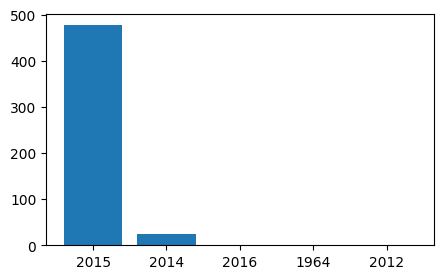

In [23]:
#CODE HERE
plt.figure(figsize=(5, 3))
plt.bar(fandango['YEAR'].value_counts().index, fandango['YEAR'].value_counts().values)

<AxesSubplot:xlabel='YEAR', ylabel='count'>

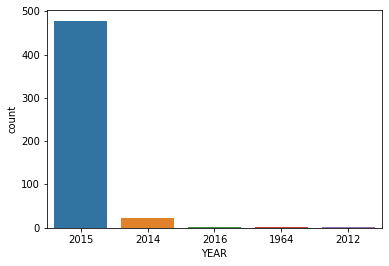

**TASK: What are the 10 movies with the highest number of votes?**

In [24]:
#CODE HERE
fandango.sort_values(by='VOTES', ascending=False).head(10)

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


**TASK: How many movies have zero votes?**

In [25]:
#CODE HERE
zero_votes_count = (fandango['VOTES'] == 0).sum()
zero_votes_count

69

69

**TASK: Create DataFrame of only reviewed films by removing any films that have zero votes.**

In [27]:
#CODE HERE
fandango = fandango[fandango['VOTES'] > 0]

----

**As noted in the article, due to HTML and star rating displays, the true user rating may be slightly different than the rating shown to a user. Let's visualize this difference in distributions.**

**TASK: Create a KDE plot (or multiple kdeplots) that displays the distribution of ratings that are displayed (STARS) versus what the true rating was from votes (RATING). Clip the KDEs to 0-5.**

<ipython-input-47-b4c58b4bc829>:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fandango['RATING'], label='True Rating', shade=True, clip=(0, 5))
<ipython-input-47-b4c58b4bc829>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fandango['STARS'], label='Stars Displayed', shade=True, clip=(0, 5))


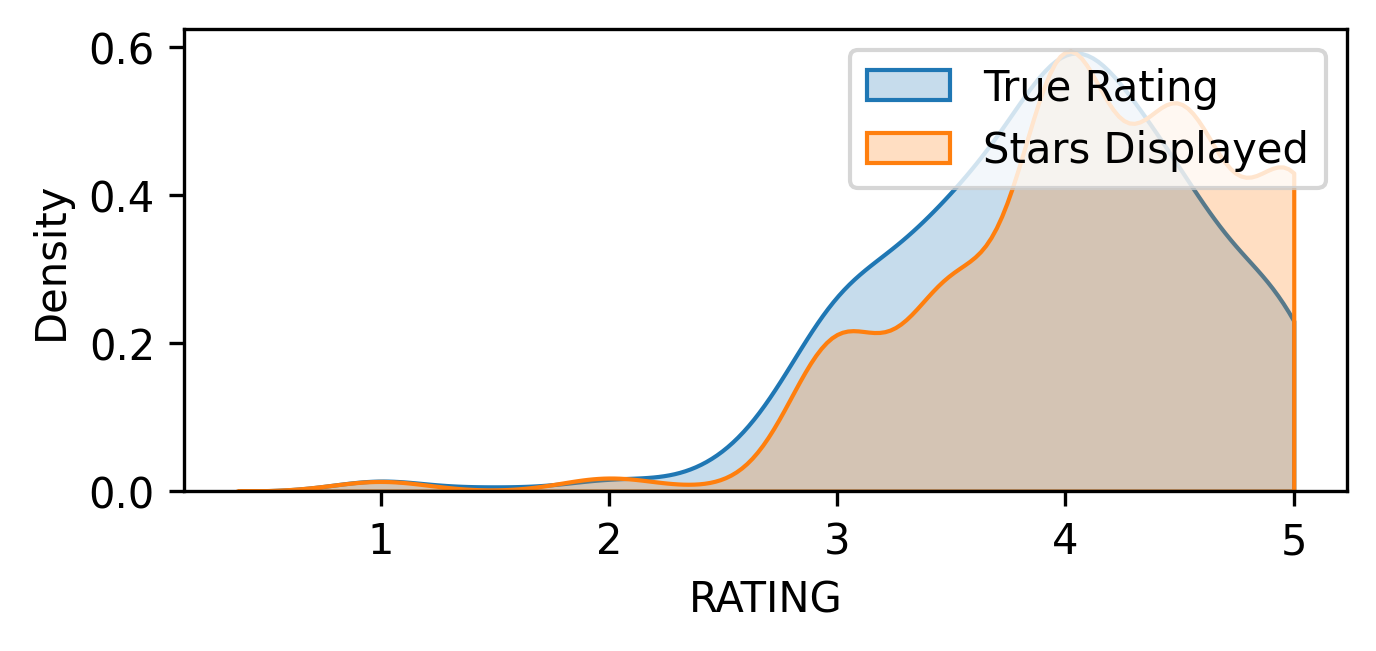

In [47]:
#CODE HERE
plt.figure(figsize=(5, 2), dpi=300)
sns.kdeplot(fandango['RATING'], label='True Rating', shade=True, clip=(0, 5))
sns.kdeplot(fandango['STARS'], label='Stars Displayed', shade=True, clip=(0, 5))
plt.legend()
plt.show()

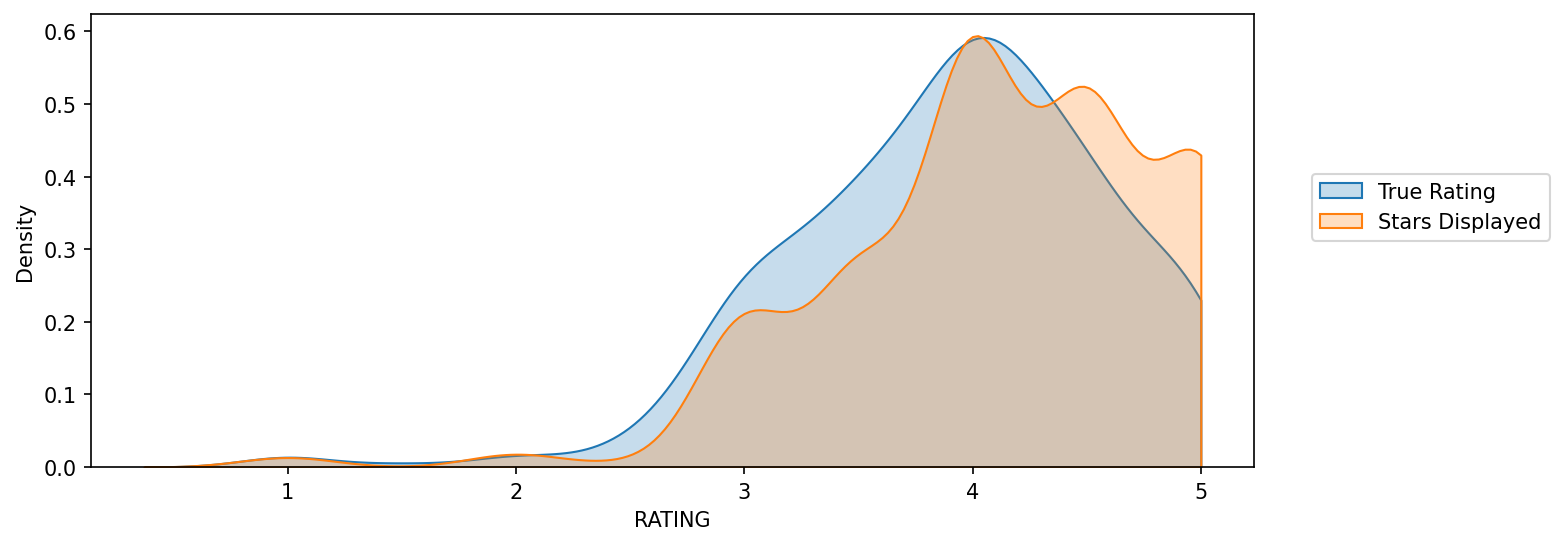

**TASK: Let's now actually quantify this discrepancy. Create a new column of the different between STARS displayed versus true RATING. Calculate this difference with STARS-RATING and round these differences to the nearest decimal point.**

In [48]:
#CODE HERE
fandango['STARS-RATING'] = round(fandango['STARS'] - fandango['RATING'], 1)

In [49]:
fandango

,FILM,STARS,RATING,VOTES,YEAR,STARS-RATING
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


**TASK: Create a count plot to display the number of times a certain difference occurs:**

<ipython-input-56-80a724105f3c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='STARS-RATING', data=fandango, palette='Set1')


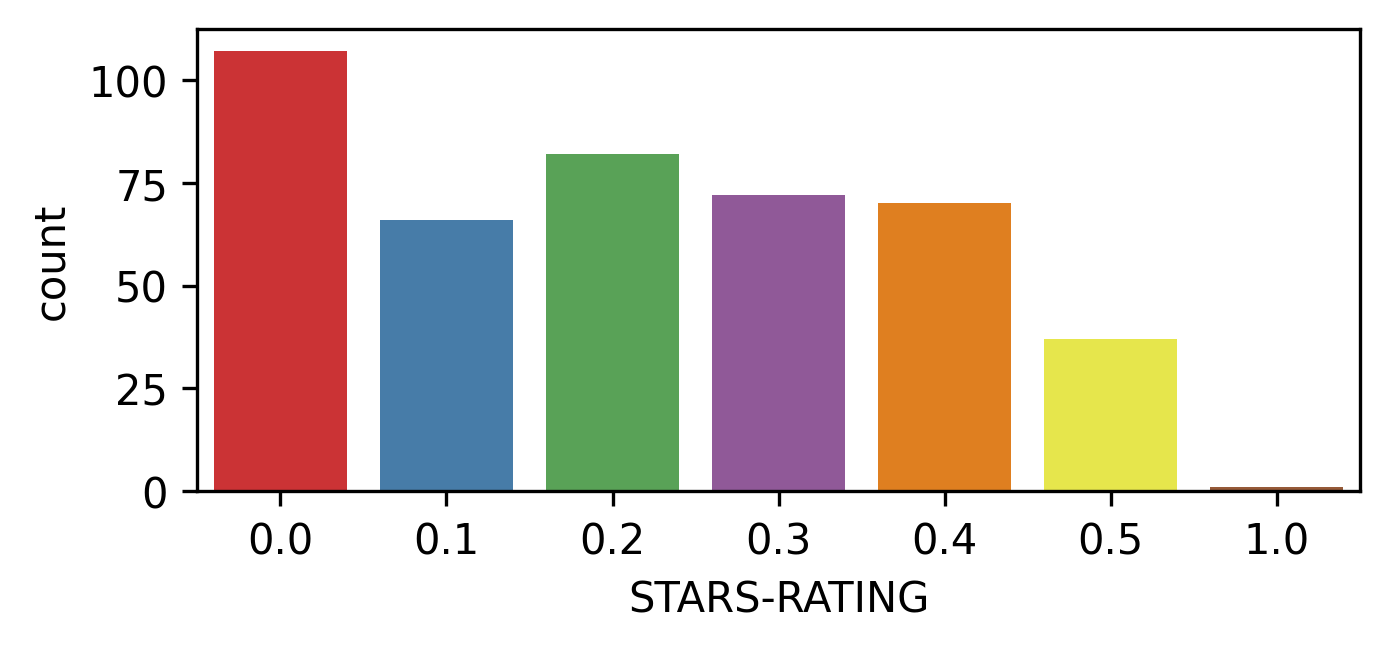

In [56]:
#CODE HERE
plt.figure(figsize=(5, 2), dpi=300)
sns.countplot(x='STARS-RATING', data=fandango, palette='Set1')
plt.show()

<AxesSubplot:xlabel='STARS_DIFF', ylabel='count'>

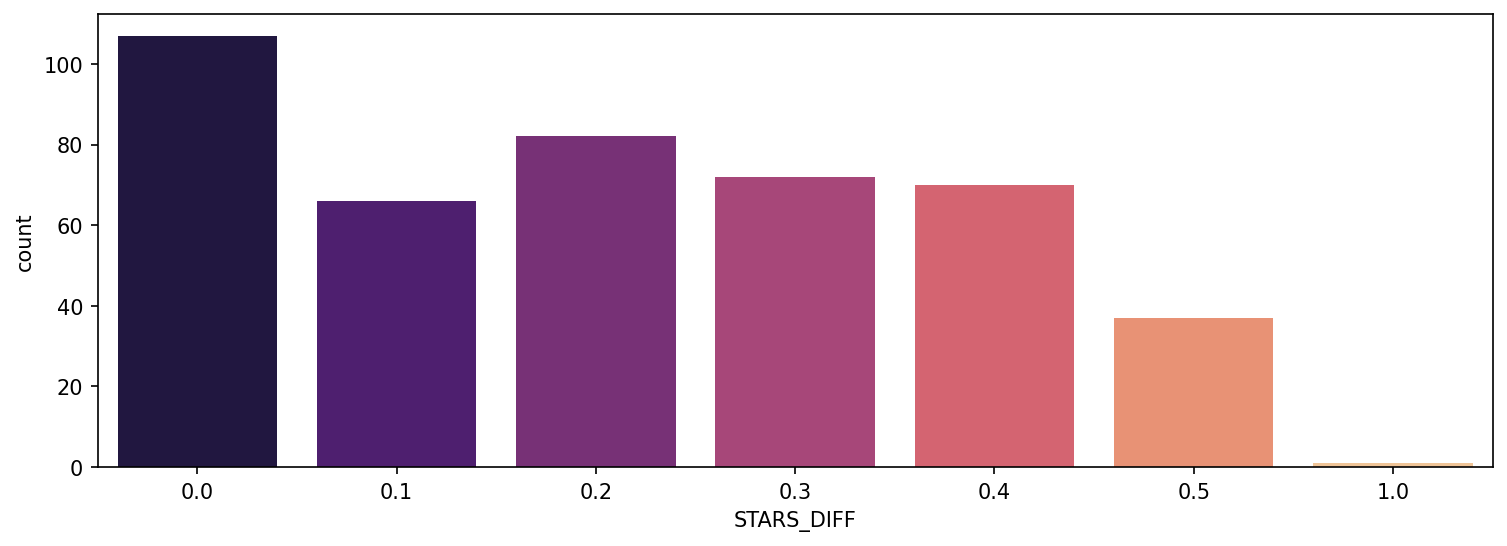

**TASK: We can see from the plot that one movie was displaying over a 1 star difference than its true rating! What movie had this close to 1 star differential?**

In [57]:
#CODE HERE
fandango[fandango['STARS-RATING'] == 1]

,FILM,STARS,RATING,VOTES,YEAR,STARS-RATING
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


## Part Three: Comparison of Fandango Ratings to Other Sites

Let's now compare the scores from Fandango to other movies sites and see how they compare.

**TASK: Read in the "all_sites_scores.csv" file by running the cell below**

In [58]:
all_sites = pd.read_csv("all_sites_scores.csv")

**TASK: Explore the DataFrame columns, info, description.**

In [60]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [61]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


### Rotten Tomatoes

Let's first take a look at Rotten Tomatoes. RT has two sets of reviews, their critics reviews (ratings published by official critics) and user reviews.

**TASK: Create a scatterplot exploring the relationship between RT Critic reviews and RT User reviews.**

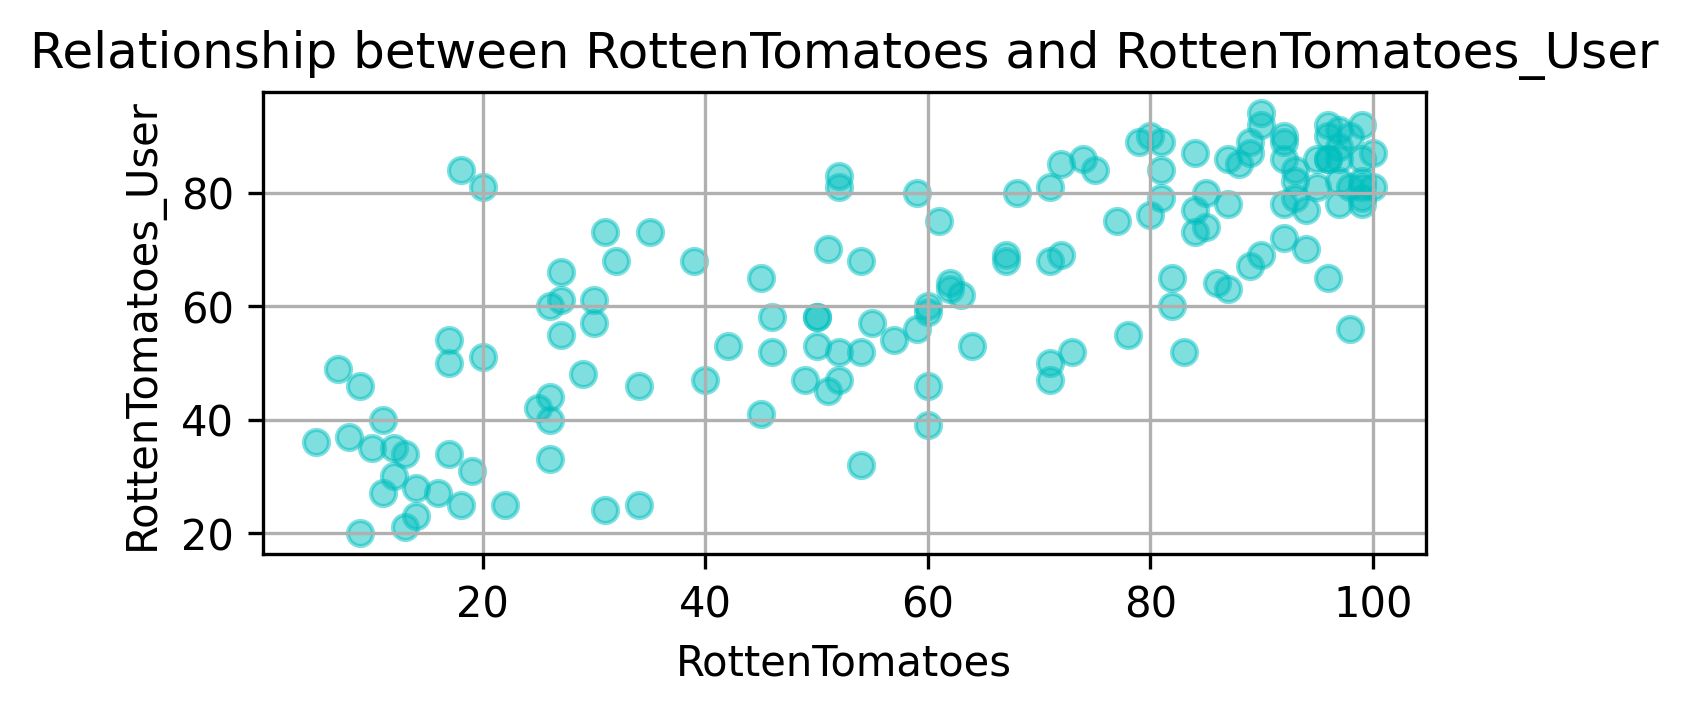

In [65]:
# CODE HERE
plt.figure(figsize=(5, 2), dpi=300)
plt.scatter(all_sites['RottenTomatoes'], all_sites['RottenTomatoes_User'], alpha=0.5, color='c')
plt.title('Relationship between RottenTomatoes and RottenTomatoes_User')
plt.xlabel('RottenTomatoes')
plt.ylabel('RottenTomatoes_User')
plt.grid(True)
plt.show()

(0.0, 100.0)

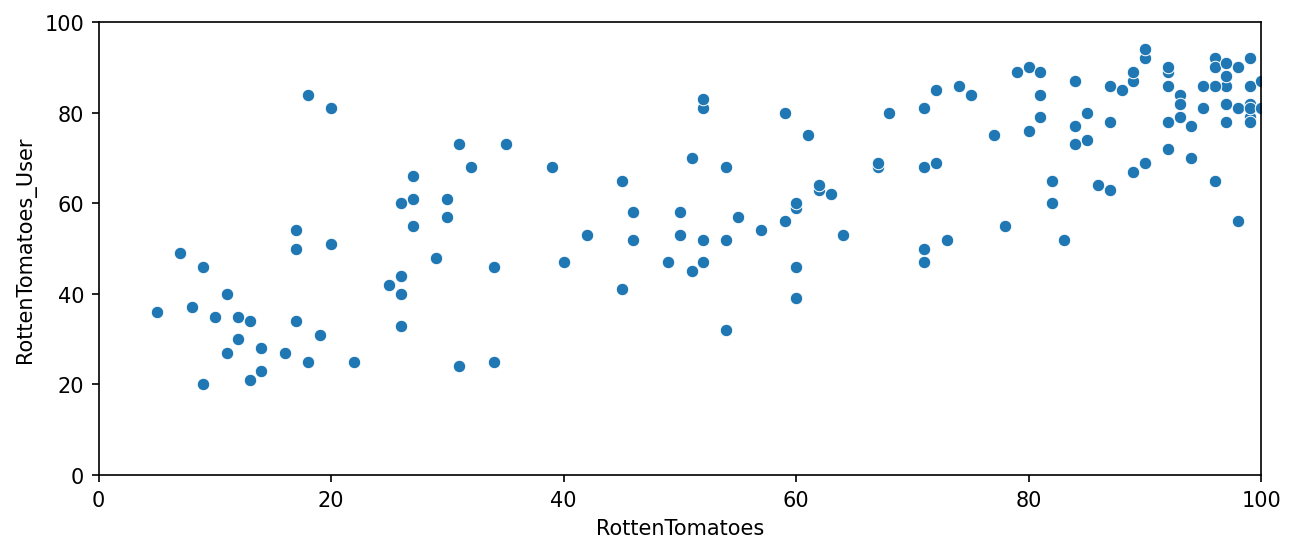

Let's quantify this difference by comparing the critics ratings and the RT User ratings. We will calculate this with RottenTomatoes-RottenTomatoes_User. Note: Rotten_Diff here is Critics - User Score. So values closer to 0 means aggrement between Critics and Users. Larger positive values means critics rated much higher than users. Larger negative values means users rated much higher than critics.

**TASK: Create a new column based off the difference between critics ratings and users ratings for Rotten Tomatoes. Calculate this with RottenTomatoes-RottenTomatoes_User**

In [66]:
#CODE HERE
all_sites['RottenTomatoes-RottenTomatoes_User'] = all_sites['RottenTomatoes']-all_sites['RottenTomatoes_User']

Let's now compare the overall mean difference. Since we're dealing with differences that could be negative or positive, first take the absolute value of all the differences, then take the mean. This would report back on average to absolute difference between the critics rating versus the user rating.

**TASK: Calculate the Mean Absolute Difference between RT scores and RT User scores as described above.**

In [68]:
# CODE HERE
all_sites['RottenTomatoes-RottenTomatoes_User'].abs().mean()

15.095890410958905

15.095890410958905

**TASK: Plot the distribution of the differences between RT Critics Score and RT User Score. There should be negative values in this distribution plot. Feel free to use KDE or Histograms to display this distribution.**

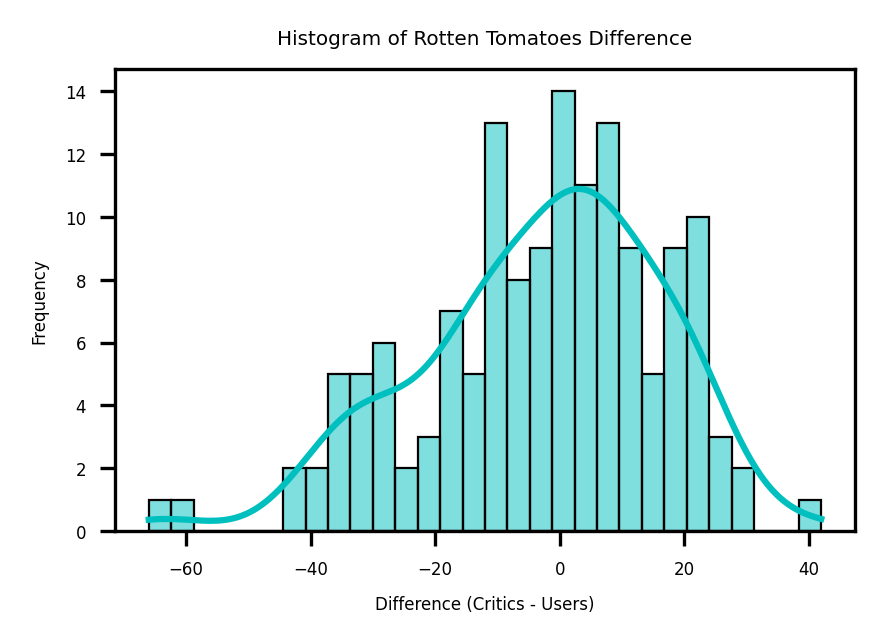

In [79]:
# CODE HERE
plt.figure(figsize=(7, 2), dpi=300)

plt.subplot(1, 2, 2)
sns.histplot(all_sites['RottenTomatoes-RottenTomatoes_User'], kde=True, bins=30, color='c')
plt.title('Rotten Tomatoes Difference')
plt.xlabel('Difference (Critics - Users)')
plt.ylabel('Frequency')

plt.show()


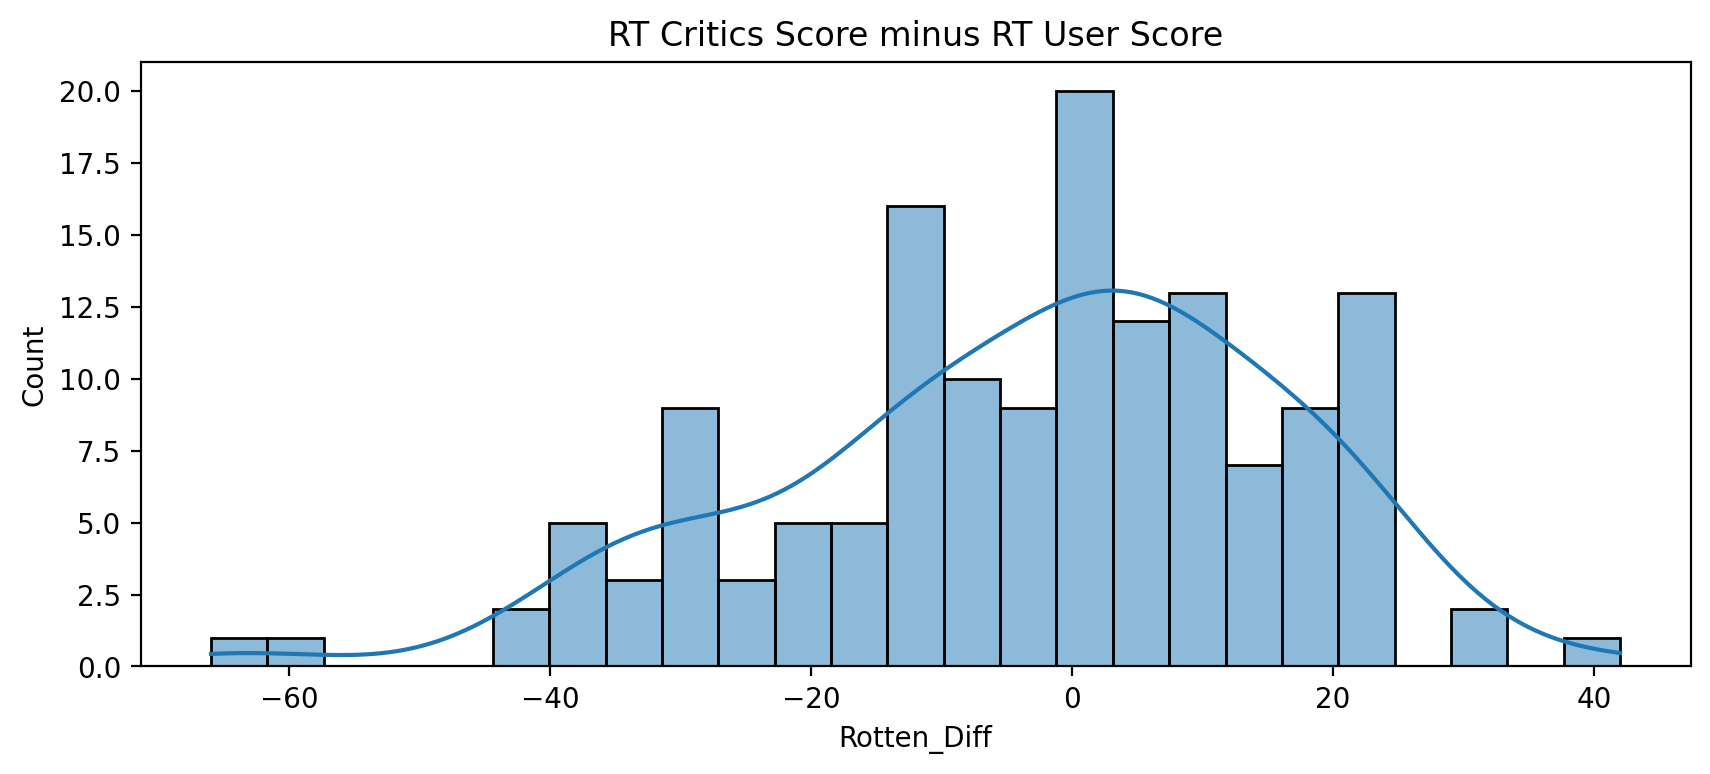

**TASK: Now create a distribution showing the *absolute value* difference between Critics and Users on Rotten Tomatoes.**

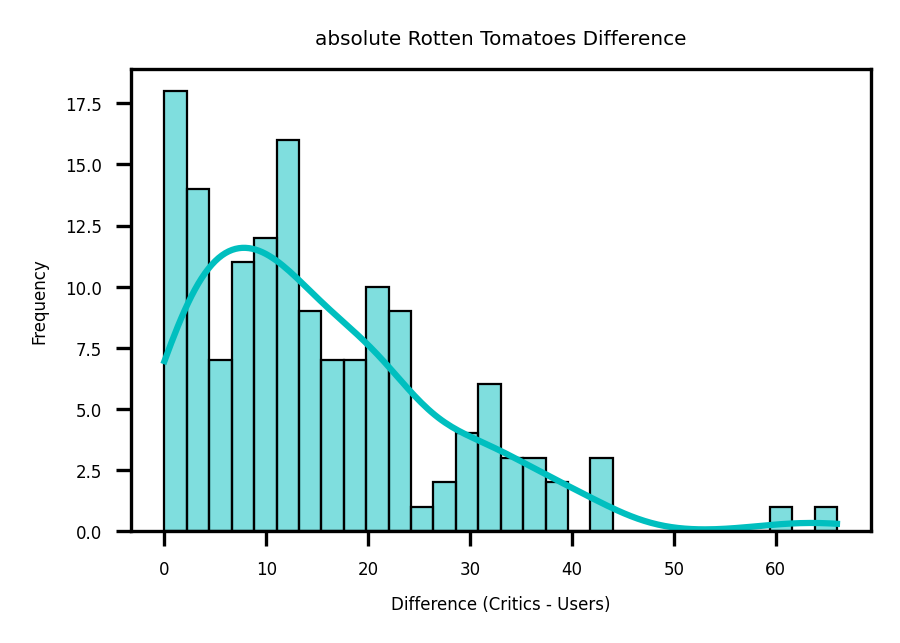

In [81]:
#CODE HERE
plt.figure(figsize=(7, 2), dpi=300)

plt.subplot(1, 2, 2)
sns.histplot(all_sites['RottenTomatoes-RottenTomatoes_User'].abs(), kde=True, bins=30, color='c')
plt.title('absolute Rotten Tomatoes Difference')
plt.xlabel('Difference (Critics - Users)')
plt.ylabel('Frequency')

plt.show()


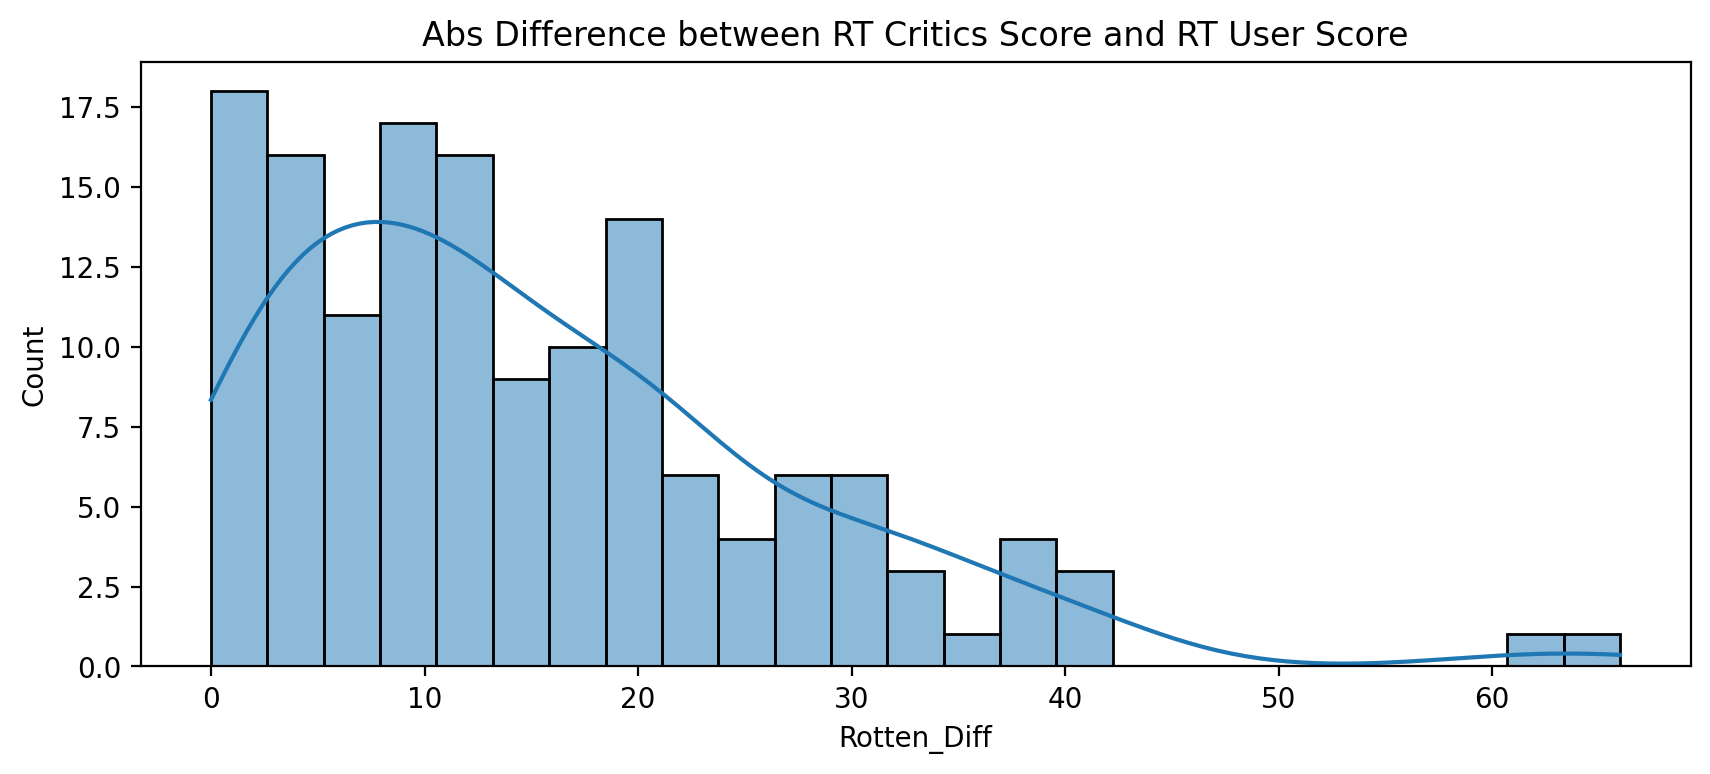

**Let's find out which movies are causing the largest differences. First, show the top 5 movies with the largest *negative* difference between Users and RT critics. Since we calculated the difference as Critics Rating - Users Rating, then large negative values imply the users rated the movie much higher on average than the critics did.**

**TASK: What are the top 5 movies users rated higher than critics on average:**

In [91]:
# CODE HERE
p = all_sites.sort_values(by='RottenTomatoes-RottenTomatoes_User', ascending=True).head(5)
p[['FILM','RottenTomatoes-RottenTomatoes_User']]

,FILM,RottenTomatoes-RottenTomatoes_User
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
134,The Longest Ride (2015),-42
105,Hitman: Agent 47 (2015),-42
125,The Wedding Ringer (2015),-39


Users Love but Critics Hate


,FILM,Rotten_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
105,Hitman: Agent 47 (2015),-42
134,The Longest Ride (2015),-42
125,The Wedding Ringer (2015),-39


**TASK: Now show the top 5 movies critics scores higher than users on average.**

In [92]:
# CODE HERE
p = all_sites.sort_values(by='RottenTomatoes-RottenTomatoes_User', ascending=False).head(5)
p[['FILM','RottenTomatoes-RottenTomatoes_User']]

,FILM,RottenTomatoes-RottenTomatoes_User
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
145,"Kumiko, The Treasure Hunter (2015)",24
37,Welcome to Me (2015),24


Critics love, but Users Hate


,FILM,Rotten_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
37,Welcome to Me (2015),24
40,I'll See You In My Dreams (2015),24


## MetaCritic

Now let's take a quick look at the ratings from MetaCritic. Metacritic also shows an average user rating versus their official displayed rating.

**TASK: Display a scatterplot of the Metacritic Rating versus the Metacritic User rating.**

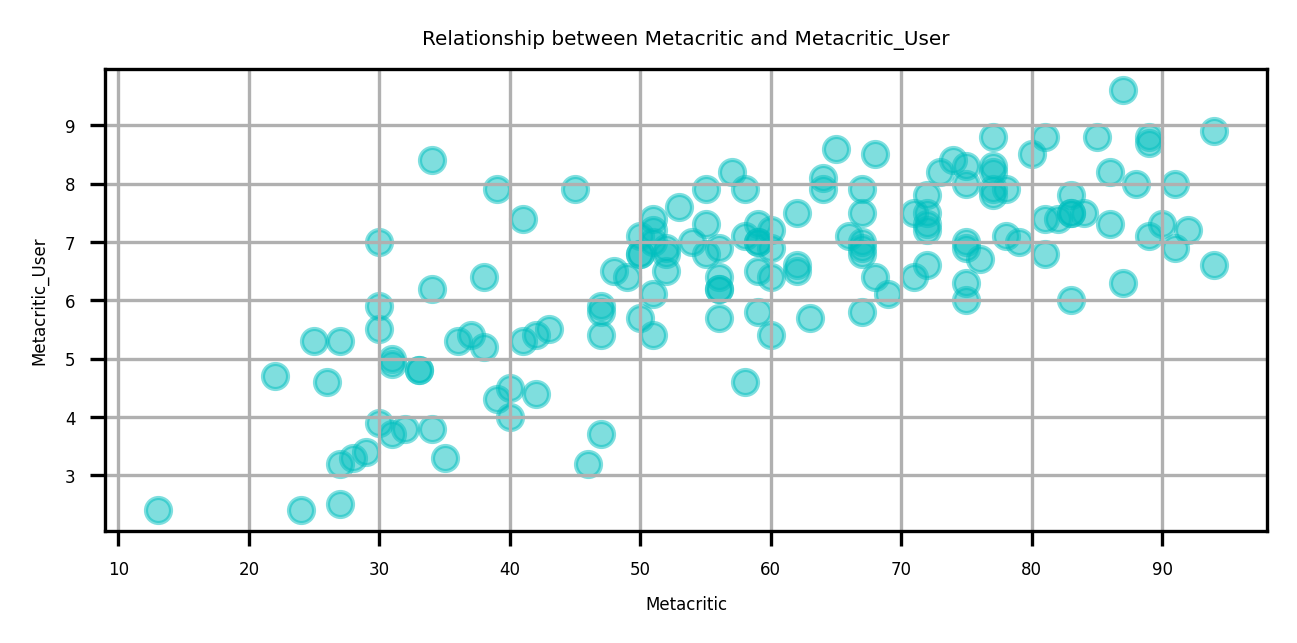

In [94]:
# CODE HERE
plt.figure(figsize=(5, 2), dpi=300)
plt.scatter(all_sites['Metacritic'], all_sites['Metacritic_User'], alpha=0.5, color='c')
plt.title('Relationship between Metacritic and Metacritic_User')
plt.xlabel('Metacritic')
plt.ylabel('Metacritic_User')
plt.grid(True)
plt.show()

(0.0, 10.0)

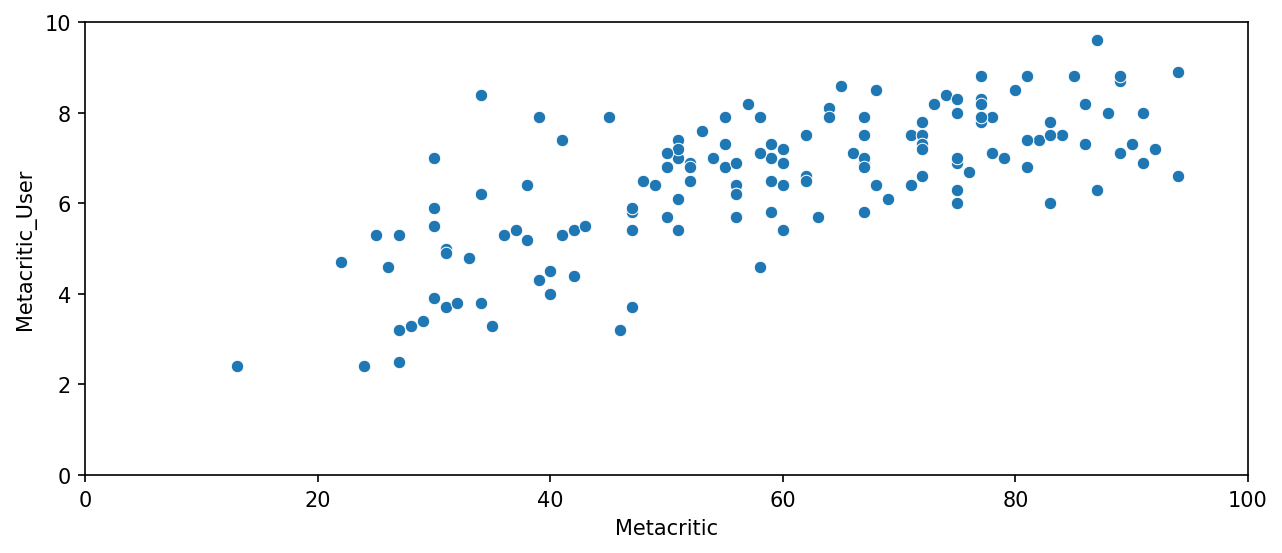

## IMDB

Finally let's explore IMDB. Notice that both Metacritic and IMDB report back vote counts. Let's analyze the most popular movies.

**TASK: Create a scatterplot for the relationship between vote counts on MetaCritic versus vote counts on IMDB.**

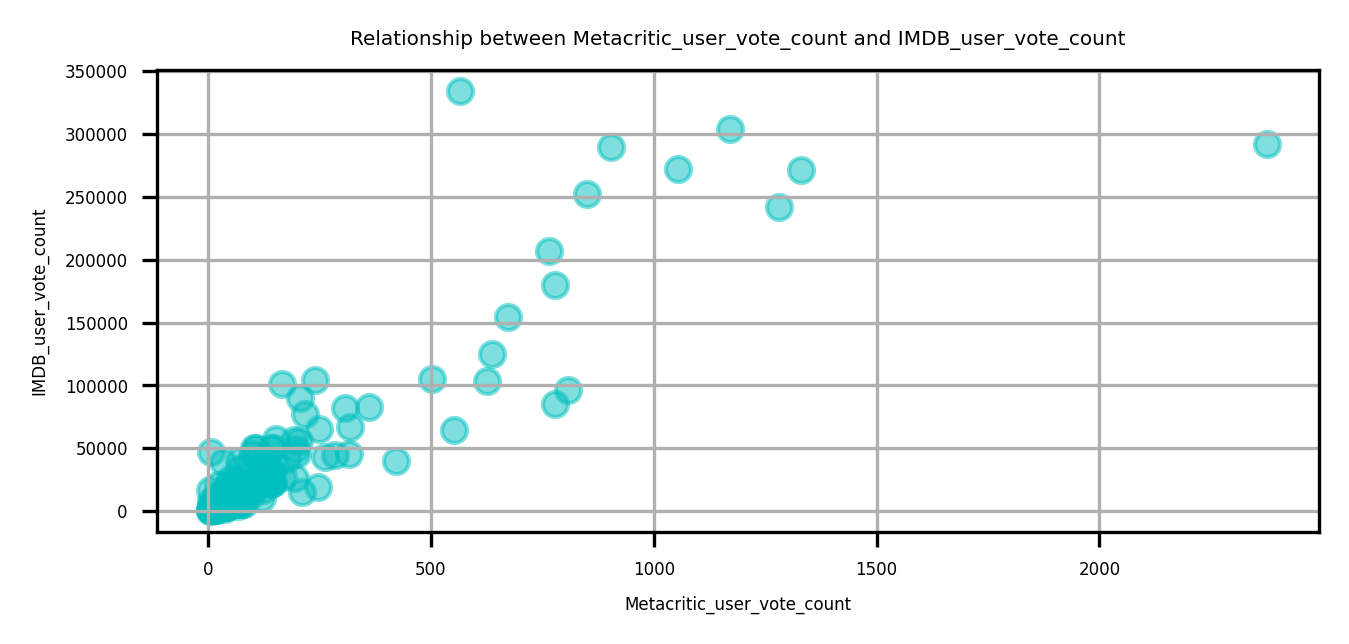

In [96]:
#CODE HERE
plt.figure(figsize=(5, 2), dpi=300)
plt.scatter(all_sites['Metacritic_user_vote_count'], all_sites['IMDB_user_vote_count'], alpha=0.5, color='c')
plt.title('Relationship between Metacritic_user_vote_count and IMDB_user_vote_count')
plt.xlabel('Metacritic_user_vote_count')
plt.ylabel('IMDB_user_vote_count')
plt.grid(True)
plt.show()

<AxesSubplot:xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

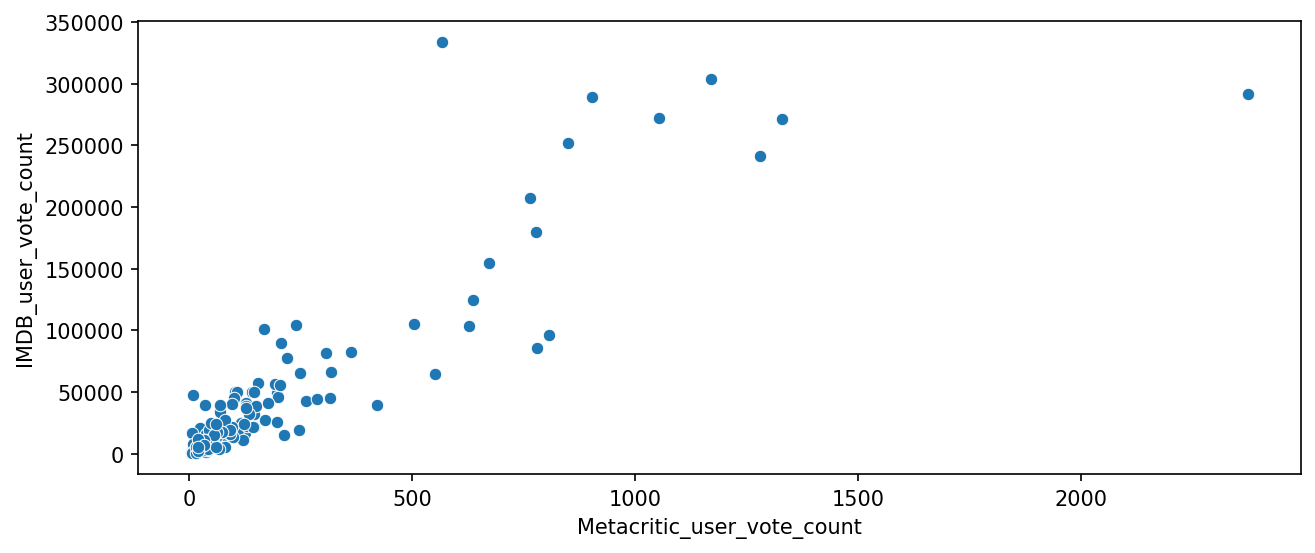

**Notice there are two outliers here. The movie with the highest vote count on IMDB only has about 500 Metacritic ratings. What is this movie?**

**TASK: What movie has the highest IMDB user vote count?**

In [97]:
#CODE HERE
all_sites.sort_values(by='IMDB_user_vote_count', ascending=False).head(1)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RottenTomatoes-RottenTomatoes_User
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


**TASK: What movie has the highest Metacritic User Vote count?**

In [98]:
#CODE HERE
all_sites.sort_values(by='Metacritic_user_vote_count', ascending=False).head(1)


,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RottenTomatoes-RottenTomatoes_User
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


## Fandago Scores vs. All Sites

Finally let's begin to explore whether or not Fandango artificially displays higher ratings than warranted to boost ticket sales.

**TASK: Combine the Fandango Table with the All Sites table. Not every movie in the Fandango table is in the All Sites table, since some Fandango movies have very little or no reviews. We only want to compare movies that are in both DataFrames, so do an *inner* merge to merge together both DataFrames based on the FILM columns.**

In [99]:
#CODE HERE
merged_df = pd.merge(fandango, all_sites, on='FILM', how='inner')


<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    object 
 5   RottenTomatoes              145 non-null    int64  
 6   RottenTomatoes_User         145 non-null    int64  
 7   Metacritic                  145 non-null    int64  
 8   Metacritic_User             145 non-null    float64
 9   IMDB                        145 non-null    float64
 10  Metacritic_user_vote_count  145 non-null    int64  
 11  IMDB_user_vote_count        145 non-null    int64  
 12  Rotten_Diff                 145 non-null    int64  
dtypes: float64(4), int64(7), object(2)


In [104]:
merged_df.head(20)

,FILM,STARS,RATING,VOTES,YEAR,STARS-RATING,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RottenTomatoes-RottenTomatoes_User,Metacritic_norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1,25,42,46,3.2,4.2,778,179506,-17,2.037037
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0,71,81,59,7.0,7.3,1281,241807,-10,2.839506
2,American Sniper (2015),5.0,4.8,34085,2015,0.2,72,85,72,6.6,7.4,850,251856,-13,3.641975
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2,81,84,67,6.8,7.4,764,207211,-3,3.333333
4,Inside Out (2015),4.5,4.5,15749,2015,0.0,98,90,94,8.9,8.6,807,96252,8,5.000000
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014,0.2,61,75,59,7.0,7.5,903,289464,-14,2.839506
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015,0.3,75,84,58,7.9,7.8,1054,272204,-9,2.777778
7,Minions (2015),4.0,4.0,14998,2015,0.0,54,52,56,5.7,6.7,204,55895,2,2.654321
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015,0.5,74,86,66,7.1,7.8,1330,271107,-12,3.271605
9,Into the Woods (2014),3.5,3.4,13055,2014,0.1,71,50,69,6.1,6.0,307,81679,21,3.456790


### Normalize columns to Fandango STARS and RATINGS 0-5

Notice that RT,Metacritic, and IMDB don't use a score between 0-5 stars like Fandango does. In order to do a fair comparison, we need to *normalize* these values so they all fall between 0-5 stars and the relationship between reviews stays the same.

**TASK: Create new normalized columns for all ratings so they match up within the 0-5 star range shown on Fandango. There are many ways to do this.**

Hint link: https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame


Easier Hint:

Keep in mind, a simple way to convert ratings:
* 100/20 = 5
* 10/2 = 5

In [106]:
all_sites['RT_Norm'] = all_sites['RottenTomatoes'] / 20
all_sites['RTU_Norm'] = all_sites['RottenTomatoes_User'] / 20
all_sites['Meta_Norm'] = all_sites['Metacritic'] / 20
all_sites['Meta_U_Norm'] = all_sites['Metacritic_User'] / 2
all_sites['IMDB_Norm'] = all_sites['IMDB'] / 2

# Display the updated DataFrame
all_sites.head()


,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RottenTomatoes-RottenTomatoes_User,RT_normalized,Metacritic_normalized,IMDB_normalized,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12,3.70,3.30,3.90,3.70,4.3,3.30,3.55,3.90
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5,4.25,3.35,3.55,4.25,4.0,3.35,3.75,3.55
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10,4.00,3.20,3.90,4.00,4.5,3.20,4.05,3.90
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66,0.90,1.10,2.70,0.90,4.2,1.10,2.35,2.70
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14,0.70,1.45,2.55,0.70,1.4,1.45,1.70,2.55


,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3


**TASK: Now create a norm_scores DataFrame that only contains the normalizes ratings. Include both STARS and RATING from the original Fandango table.**

In [116]:
fandango_columns = fandango[['FILM','STARS', 'RATING']]

# Select specific columns from all_sites
all_sites_columns = all_sites[['FILM','RT_Norm', 	'RTU_Norm', 	'Meta_Norm', 	'Meta_U_Norm', 	'IMDB_Norm']]

In [135]:
combined_df = pd.merge(fandango_columns, all_sites_columns, on='FILM')

In [136]:
combined_df.head()

,FILM,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,1.25,2.10,2.30,1.60,2.10
1,Jurassic World (2015),4.5,4.5,3.55,4.05,2.95,3.50,3.65
2,American Sniper (2015),5.0,4.8,3.60,4.25,3.60,3.30,3.70
3,Furious 7 (2015),5.0,4.8,4.05,4.20,3.35,3.40,3.70
4,Inside Out (2015),4.5,4.5,4.90,4.50,4.70,4.45,4.30


,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3


### Comparing Distribution of Scores Across Sites


Now the moment of truth! Does Fandango display abnormally high ratings? We already know it pushs displayed RATING higher than STARS, but are the ratings themselves higher than average?


**TASK: Create a plot comparing the distributions of normalized ratings across all sites. There are many ways to do this, but explore the Seaborn KDEplot docs for some simple ways to quickly show this. Don't worry if your plot format does not look exactly the same as ours, as long as the differences in distribution are clear.**

Quick Note if you have issues moving the legend for a seaborn kdeplot: https://github.com/mwaskom/seaborn/issues/2280

<ipython-input-137-f5534ee6f869>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(combined_df['STARS'], label='STARS', shade=True, clip=(0, 5))
<ipython-input-137-f5534ee6f869>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(combined_df['RATING'], label='RATING', shade=True, clip=(0, 5))
<ipython-input-137-f5534ee6f869>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(combined_df['RT_Norm'], label='RT_Norm', shade=True, clip=(0, 5))
<ipython-input-137-f5534ee6f869>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

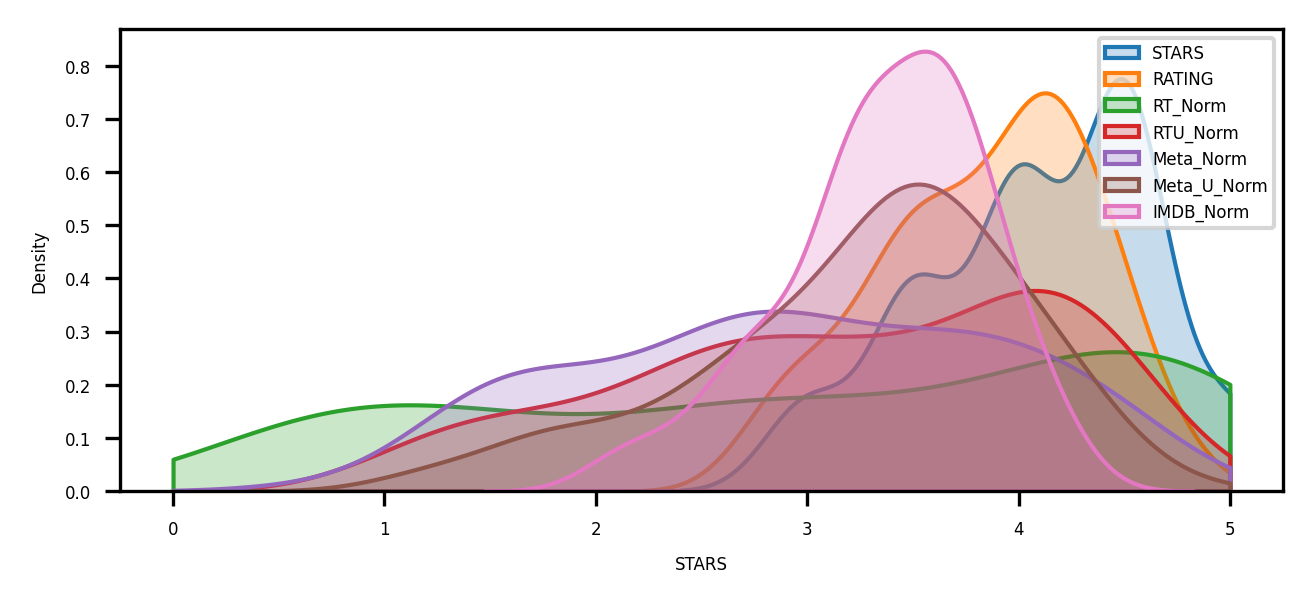

In [137]:
#CODE HERE
plt.figure(figsize=(5, 2), dpi=300)
sns.kdeplot(combined_df['STARS'], label='STARS', shade=True, clip=(0, 5))
sns.kdeplot(combined_df['RATING'], label='RATING', shade=True, clip=(0, 5))
sns.kdeplot(combined_df['RT_Norm'], label='RT_Norm', shade=True, clip=(0, 5))
sns.kdeplot(combined_df['RTU_Norm'], label='RTU_Norm', shade=True, clip=(0, 5))
sns.kdeplot(combined_df['Meta_Norm'], label='Meta_Norm', shade=True, clip=(0, 5))
sns.kdeplot(combined_df['Meta_U_Norm'], label='Meta_U_Norm', shade=True, clip=(0, 5))
sns.kdeplot(combined_df['IMDB_Norm'], label='IMDB_Norm', shade=True, clip=(0, 5))
plt.legend()
plt.show()



<ipython-input-150-98da12160932>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(combined_df['STARS'], label='STARS', shade=True, clip=(0, 5), color='blue')
<ipython-input-150-98da12160932>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(combined_df['RATING'], label='RATING', shade=True, clip=(0, 5), color='orange')
<ipython-input-150-98da12160932>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(combined_df['RT_Norm'], label='RT_Norm', shade=True, clip=(0, 5), color='green')
<ipython-input-150-98da12160932>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error

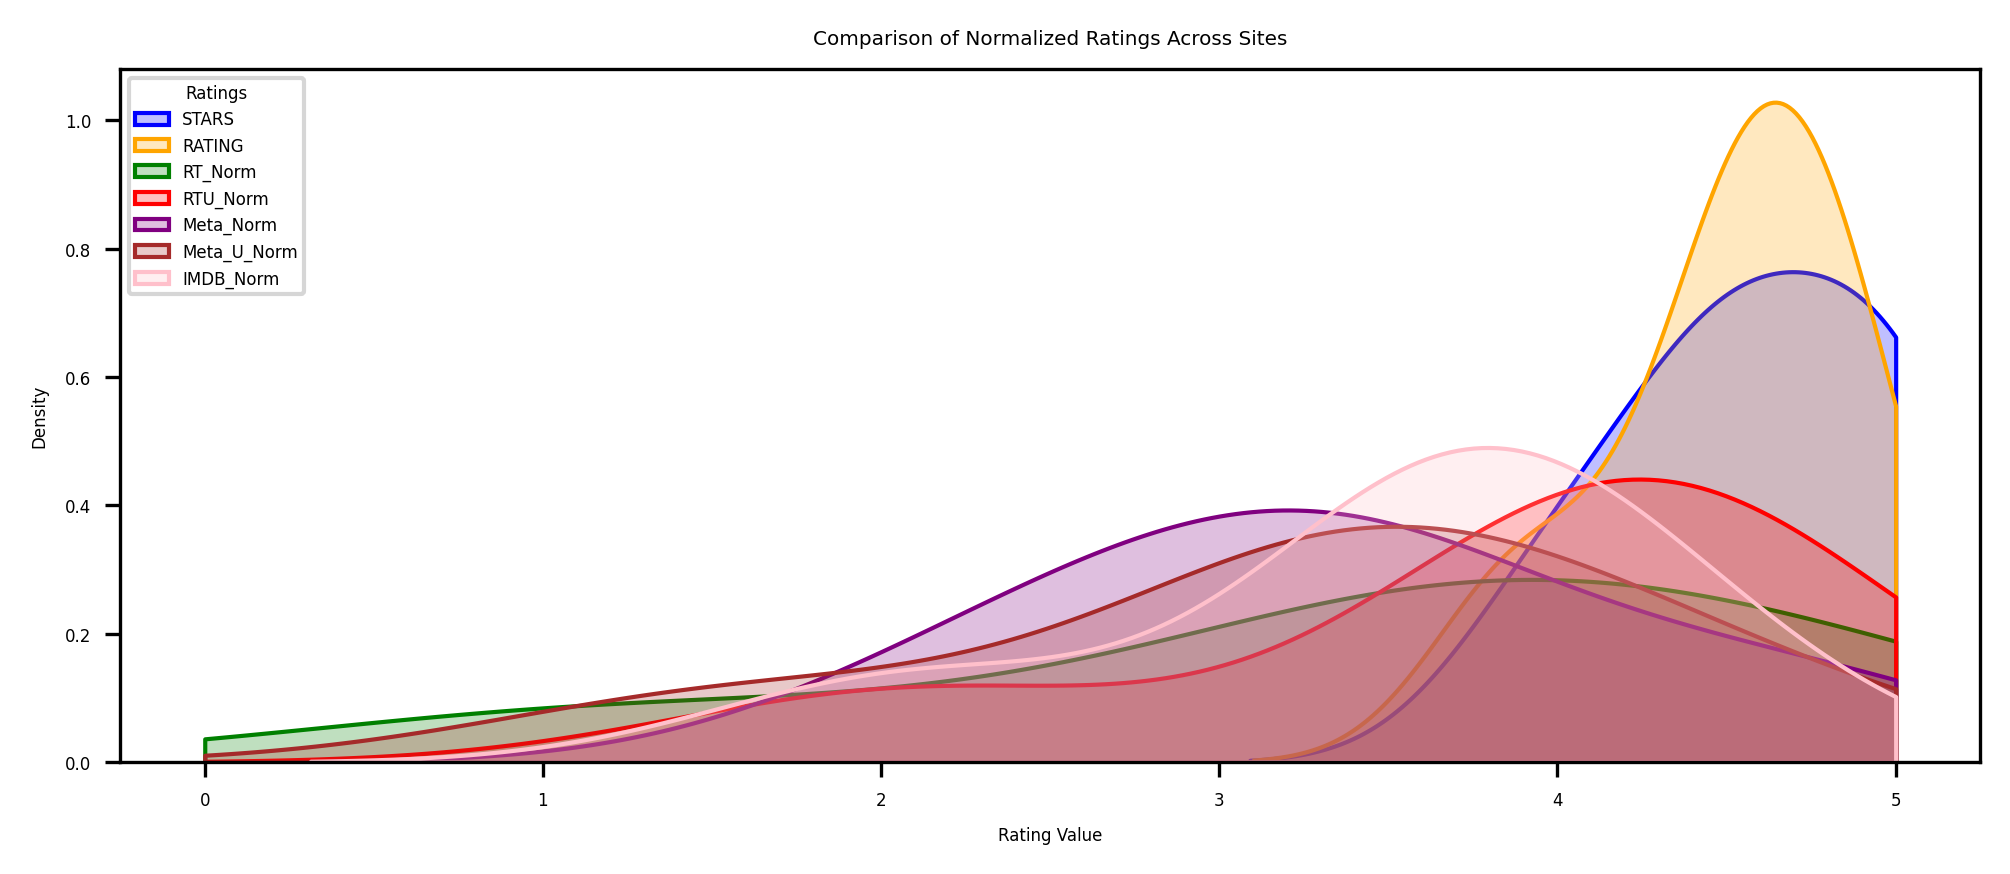

In [150]:
plt.figure(figsize=(8, 3), dpi=300)

# Plot KDE for each rating (normalized ratings across all sites)
sns.kdeplot(combined_df['STARS'], label='STARS', shade=True, clip=(0, 5), color='blue')
sns.kdeplot(combined_df['RATING'], label='RATING', shade=True, clip=(0, 5), color='orange')
sns.kdeplot(combined_df['RT_Norm'], label='RT_Norm', shade=True, clip=(0, 5), color='green')
sns.kdeplot(combined_df['RTU_Norm'], label='RTU_Norm', shade=True, clip=(0, 5), color='red')
sns.kdeplot(combined_df['Meta_Norm'], label='Meta_Norm', shade=True, clip=(0, 5), color='purple')
sns.kdeplot(combined_df['Meta_U_Norm'], label='Meta_U_Norm', shade=True, clip=(0, 5), color='brown')
sns.kdeplot(combined_df['IMDB_Norm'], label='IMDB_Norm', shade=True, clip=(0, 5), color='pink')

# Add a legend to the plot
plt.legend(title='Ratings', loc='upper left')

# Add titles and labels
plt.title('Comparison of Normalized Ratings Across Sites')
plt.xlabel('Rating Value')
plt.ylabel('Density')

# Display the plot
plt.show()

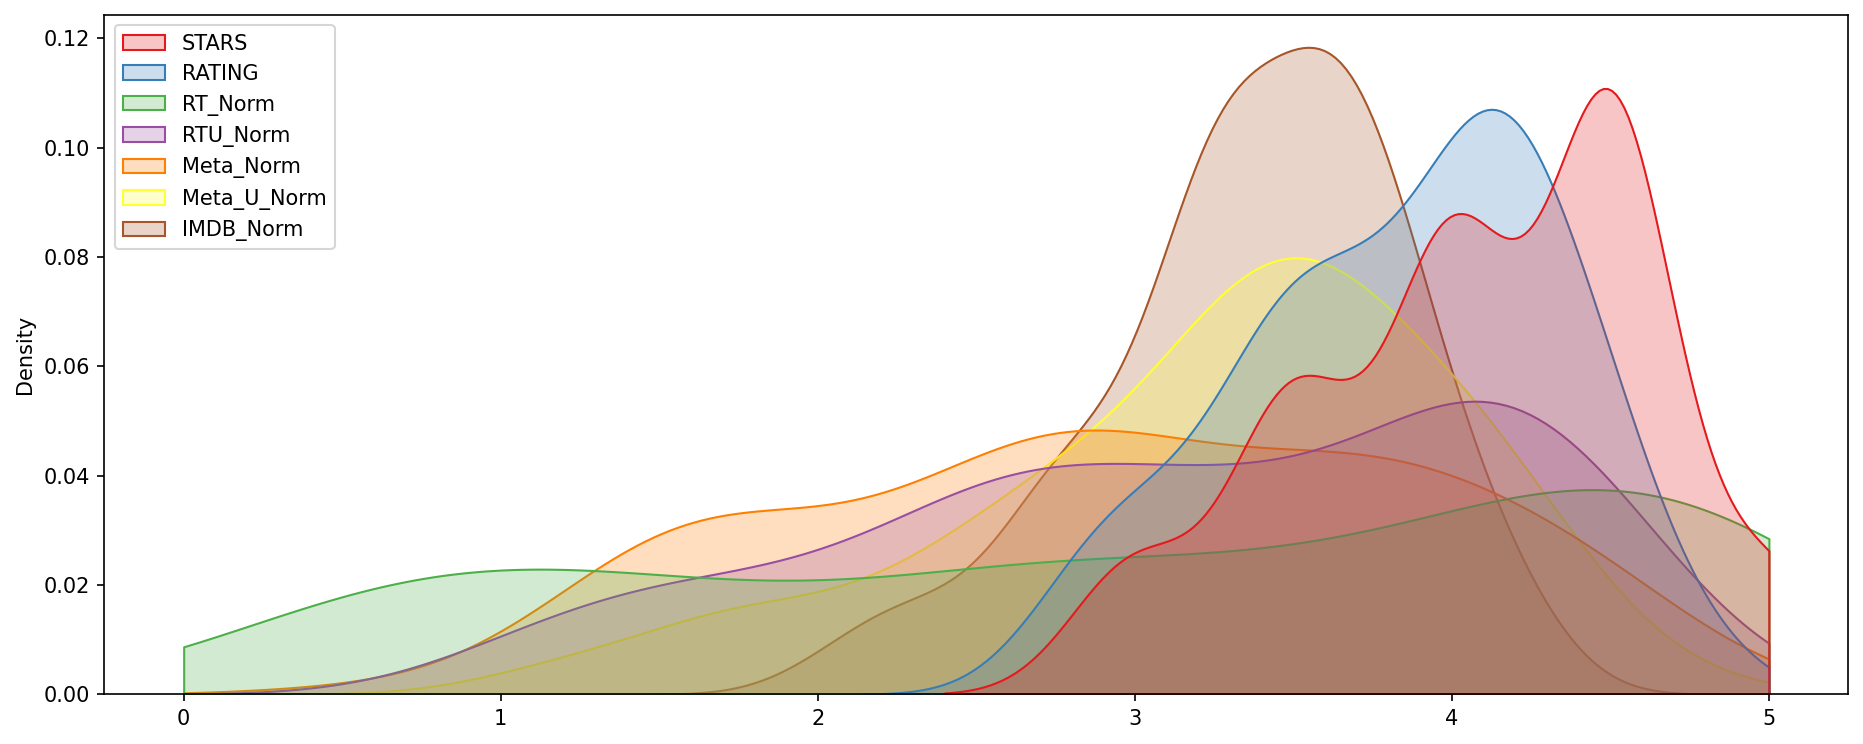

**Clearly Fandango has an uneven distribution. We can also see that RT critics have the most uniform distribution. Let's directly compare these two.**

**TASK: Create a KDE plot that compare the distribution of RT critic ratings against the STARS displayed by Fandango.**

<ipython-input-139-72643bd3da9a>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(combined_df['RT_Norm'], label='RT_Norm', shade=True, clip=(0, 5), color='blue')
<ipython-input-139-72643bd3da9a>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(combined_df['STARS'], label='STARS', shade=True, clip=(0, 5), color='orange')


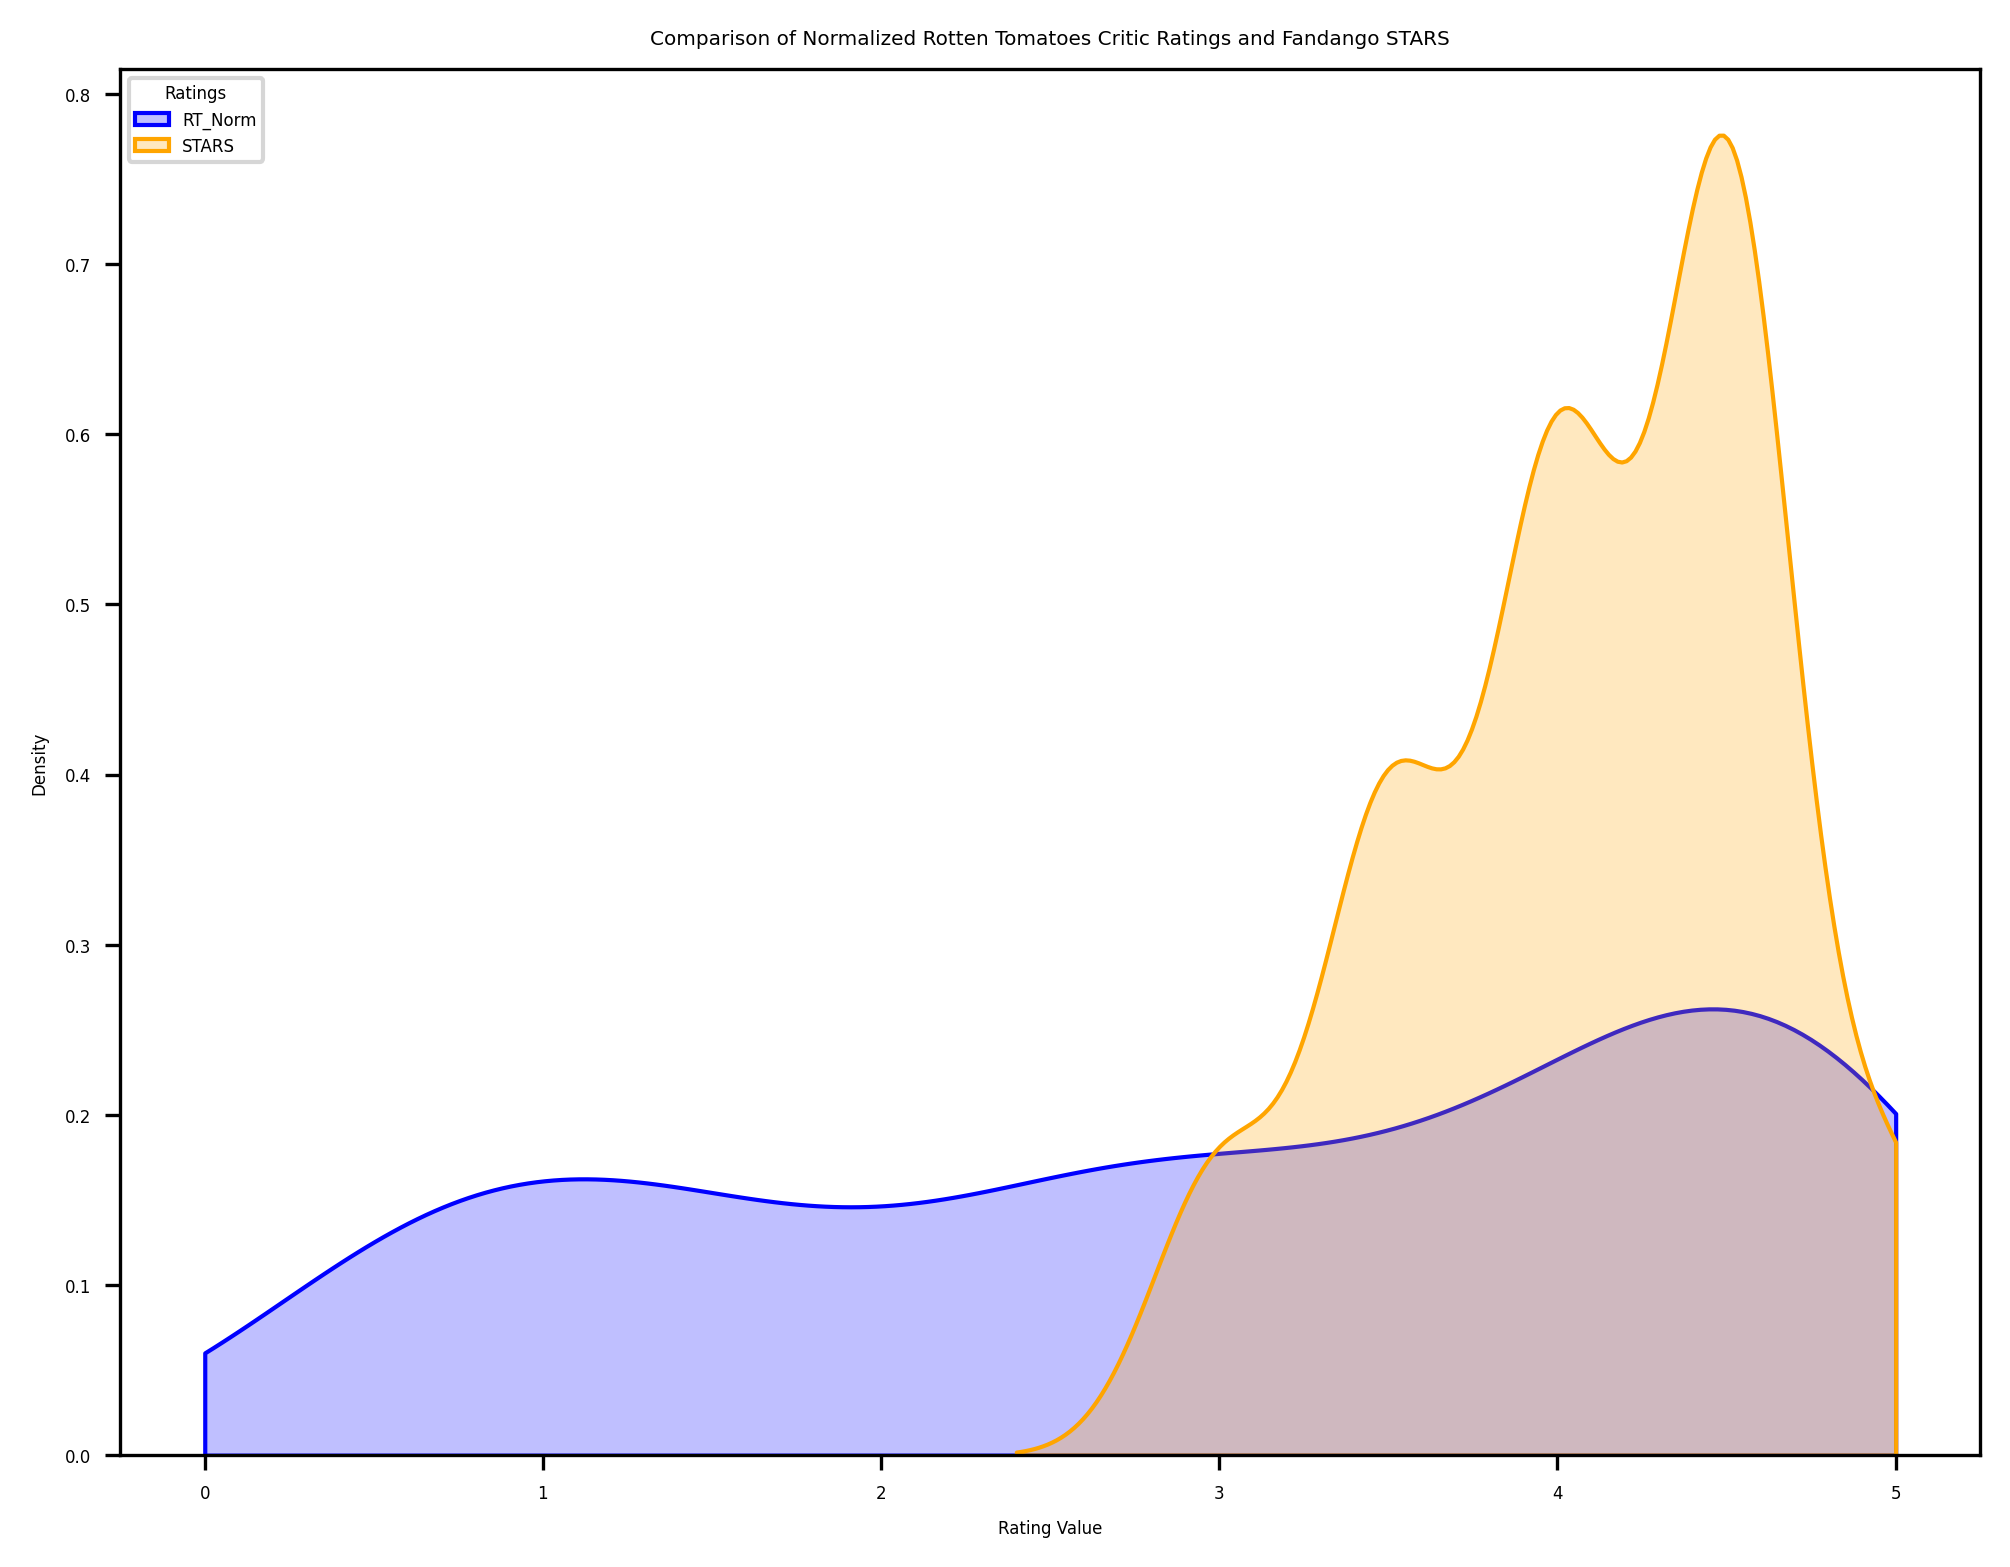

In [139]:
plt.figure(figsize=(8, 6), dpi=300)

# Plot the KDE for normalized Rotten Tomatoes critic ratings
sns.kdeplot(combined_df['RT_Norm'], label='RT_Norm', shade=True, clip=(0, 5), color='blue')

# Plot the KDE for STARS displayed by Fandango
sns.kdeplot(combined_df['STARS'], label='STARS', shade=True, clip=(0, 5), color='orange')

# Add a legend to the plot
plt.legend(title='Ratings', loc='upper left')

# Add titles and labels
plt.title('Comparison of Normalized Rotten Tomatoes Critic Ratings and Fandango STARS')
plt.xlabel('Rating Value')
plt.ylabel('Density')

# Display the plot
plt.show()

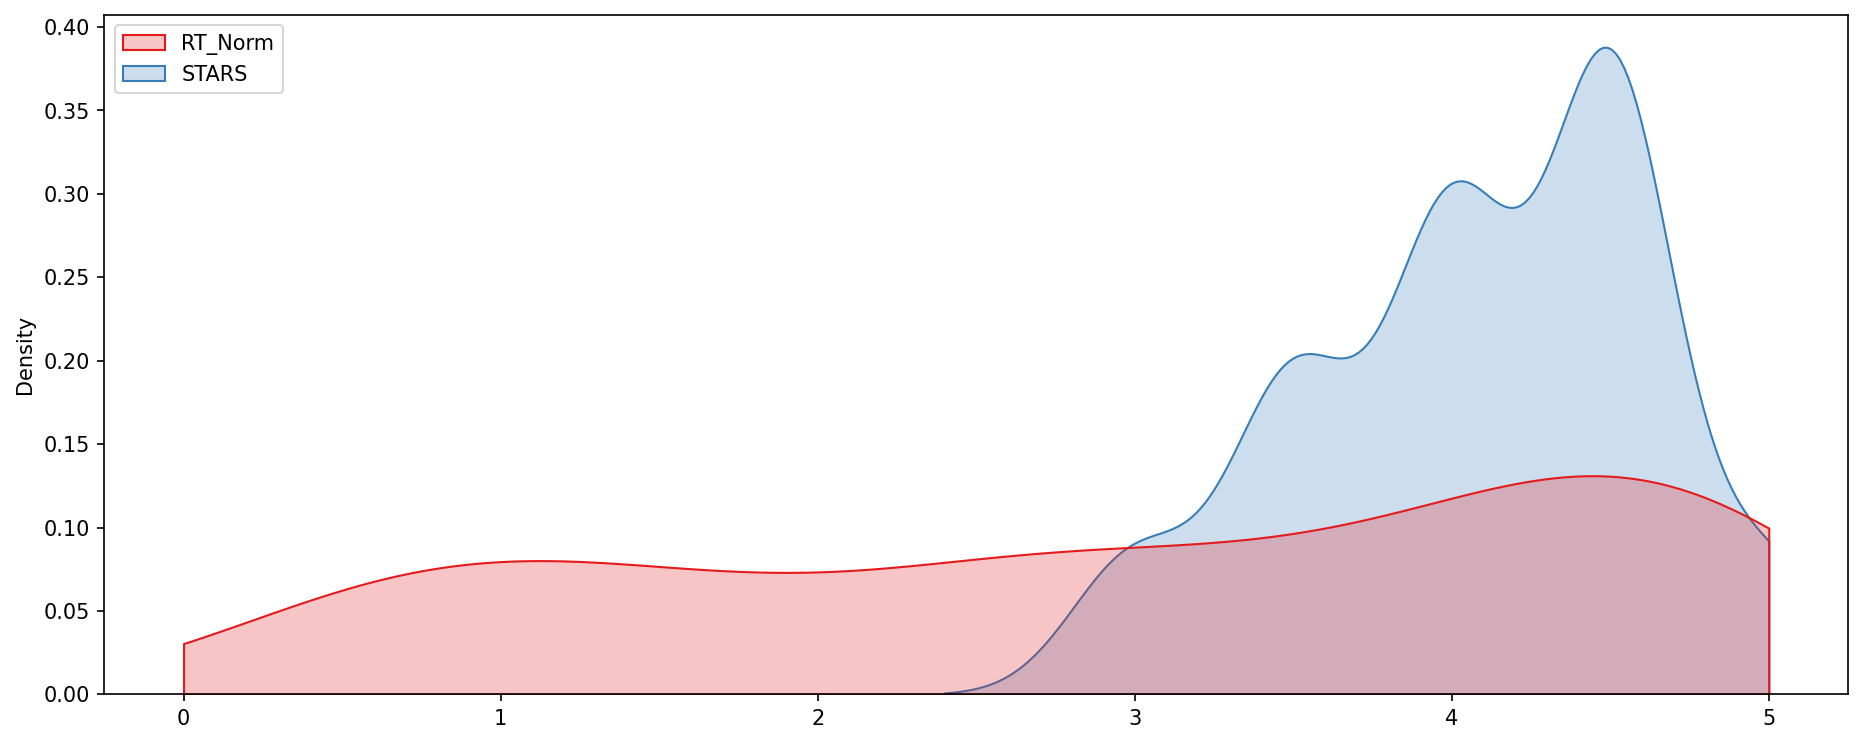

**OPTIONAL TASK: Create a histplot comparing all normalized scores.**

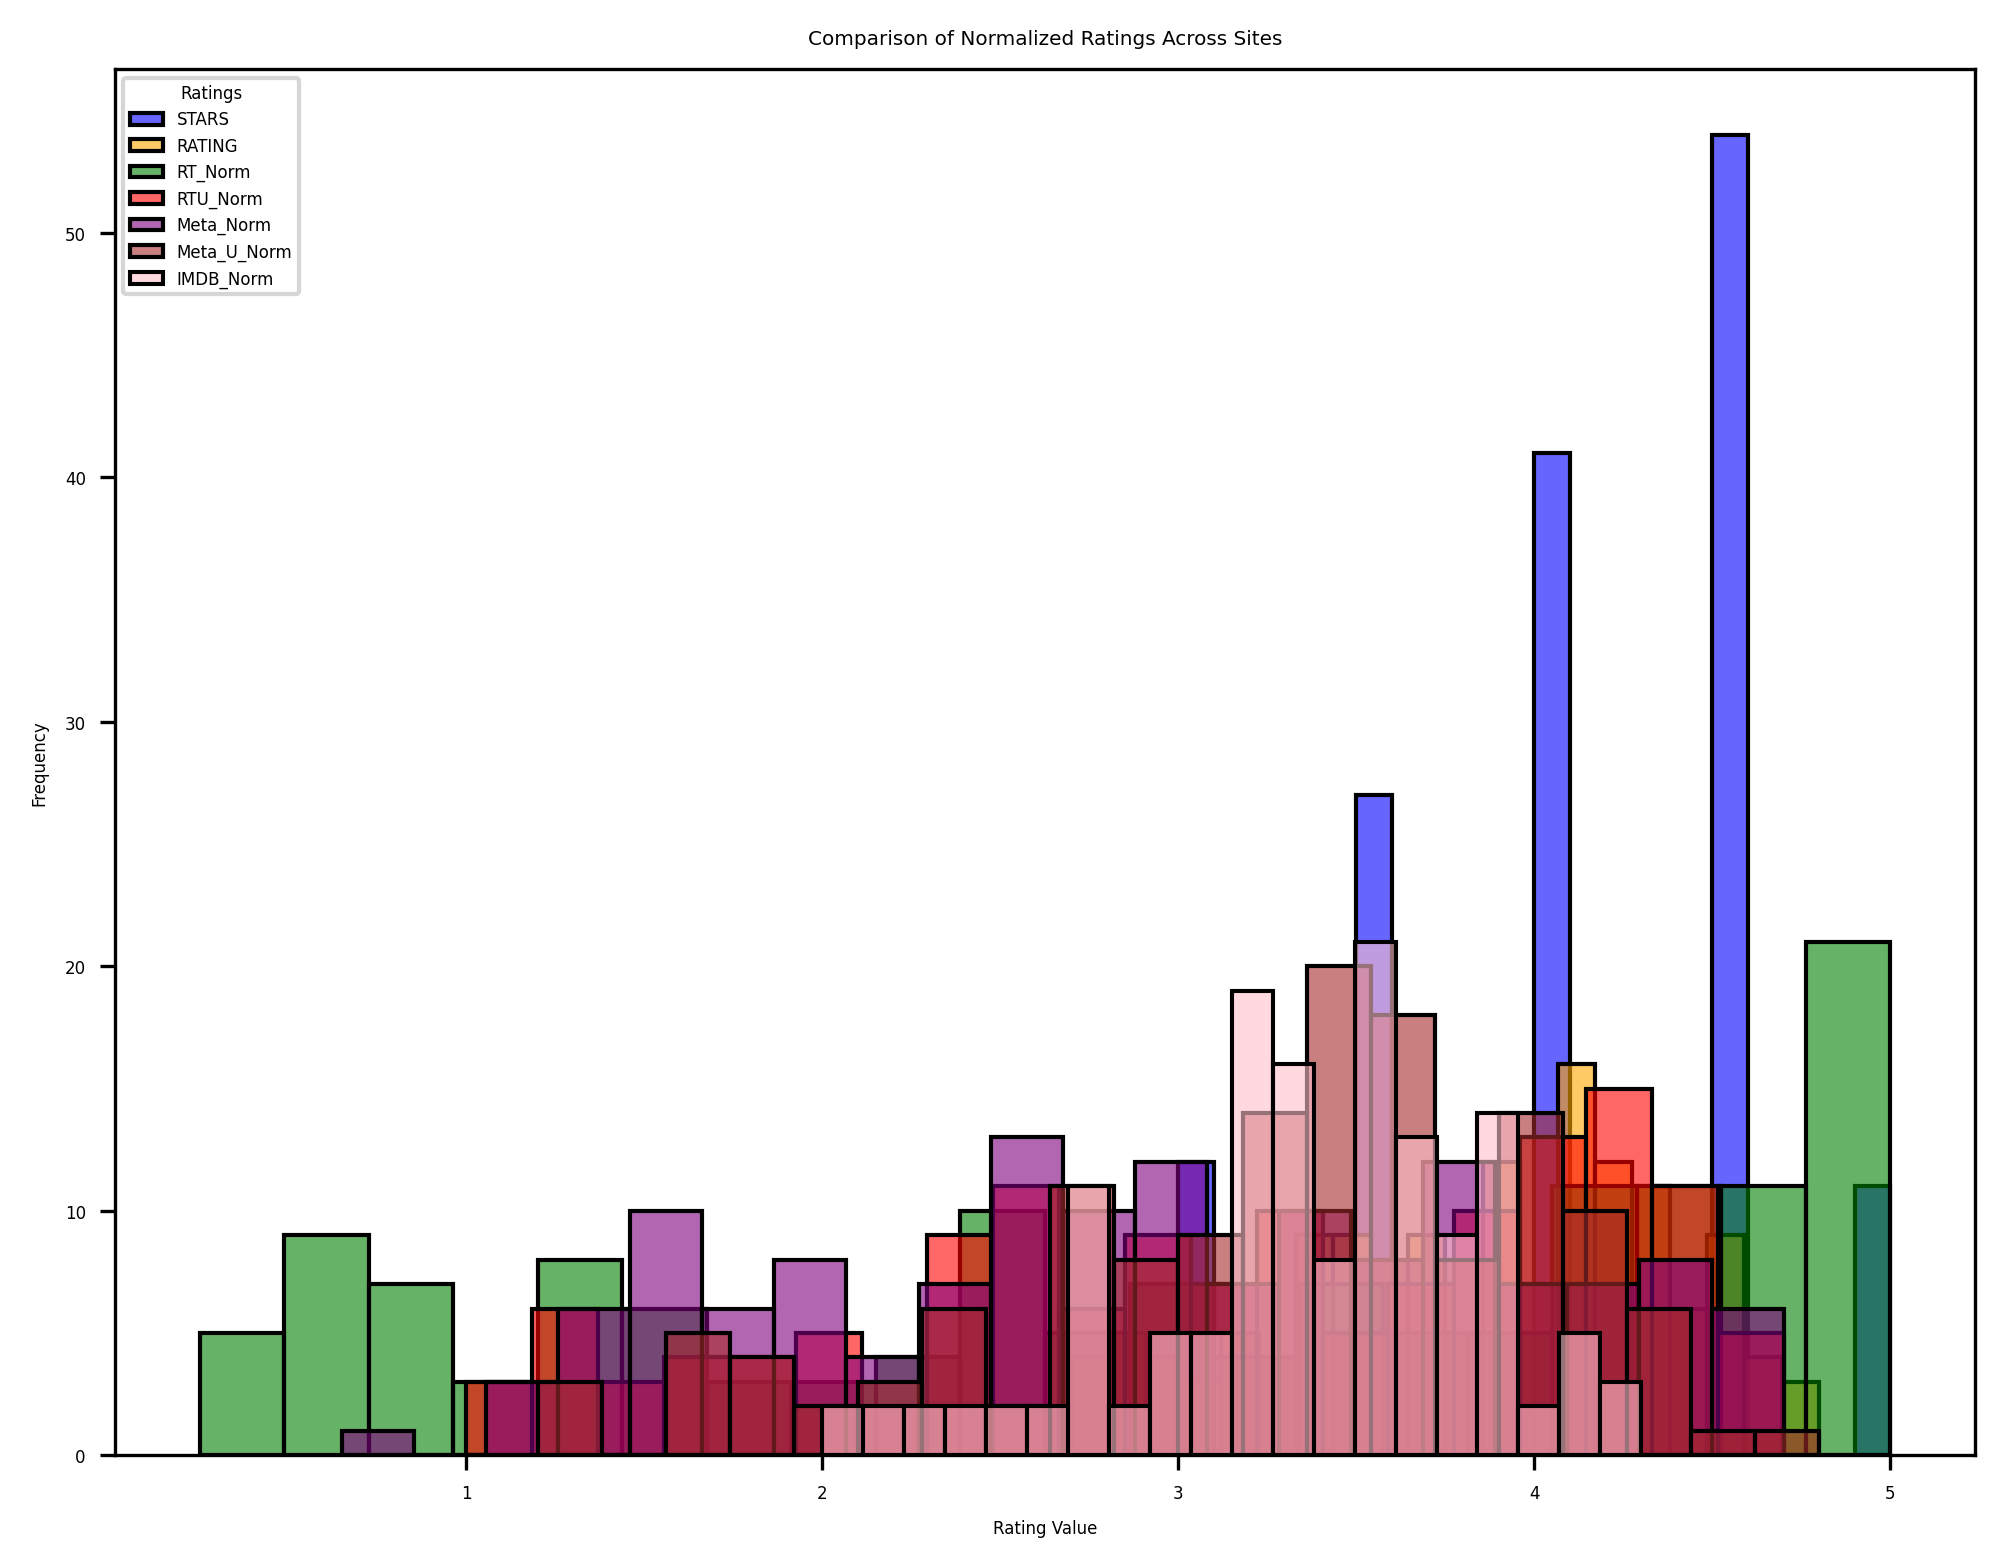

In [140]:
plt.figure(figsize=(8, 6), dpi=300)

# Plot histograms for each rating (normalized ratings across all sites)
sns.histplot(combined_df['STARS'], label='STARS', bins=20, kde=False, color='blue', alpha=0.6)
sns.histplot(combined_df['RATING'], label='RATING', bins=20, kde=False, color='orange', alpha=0.6)
sns.histplot(combined_df['RT_Norm'], label='RT_Norm', bins=20, kde=False, color='green', alpha=0.6)
sns.histplot(combined_df['RTU_Norm'], label='RTU_Norm', bins=20, kde=False, color='red', alpha=0.6)
sns.histplot(combined_df['Meta_Norm'], label='Meta_Norm', bins=20, kde=False, color='purple', alpha=0.6)
sns.histplot(combined_df['Meta_U_Norm'], label='Meta_U_Norm', bins=20, kde=False, color='brown', alpha=0.6)
sns.histplot(combined_df['IMDB_Norm'], label='IMDB_Norm', bins=20, kde=False, color='pink', alpha=0.6)

# Add a legend to the plot
plt.legend(title='Ratings', loc='upper left')

# Add titles and labels
plt.title('Comparison of Normalized Ratings Across Sites')
plt.xlabel('Rating Value')
plt.ylabel('Frequency')

# Display the plot
plt.show()

<AxesSubplot:ylabel='Count'>

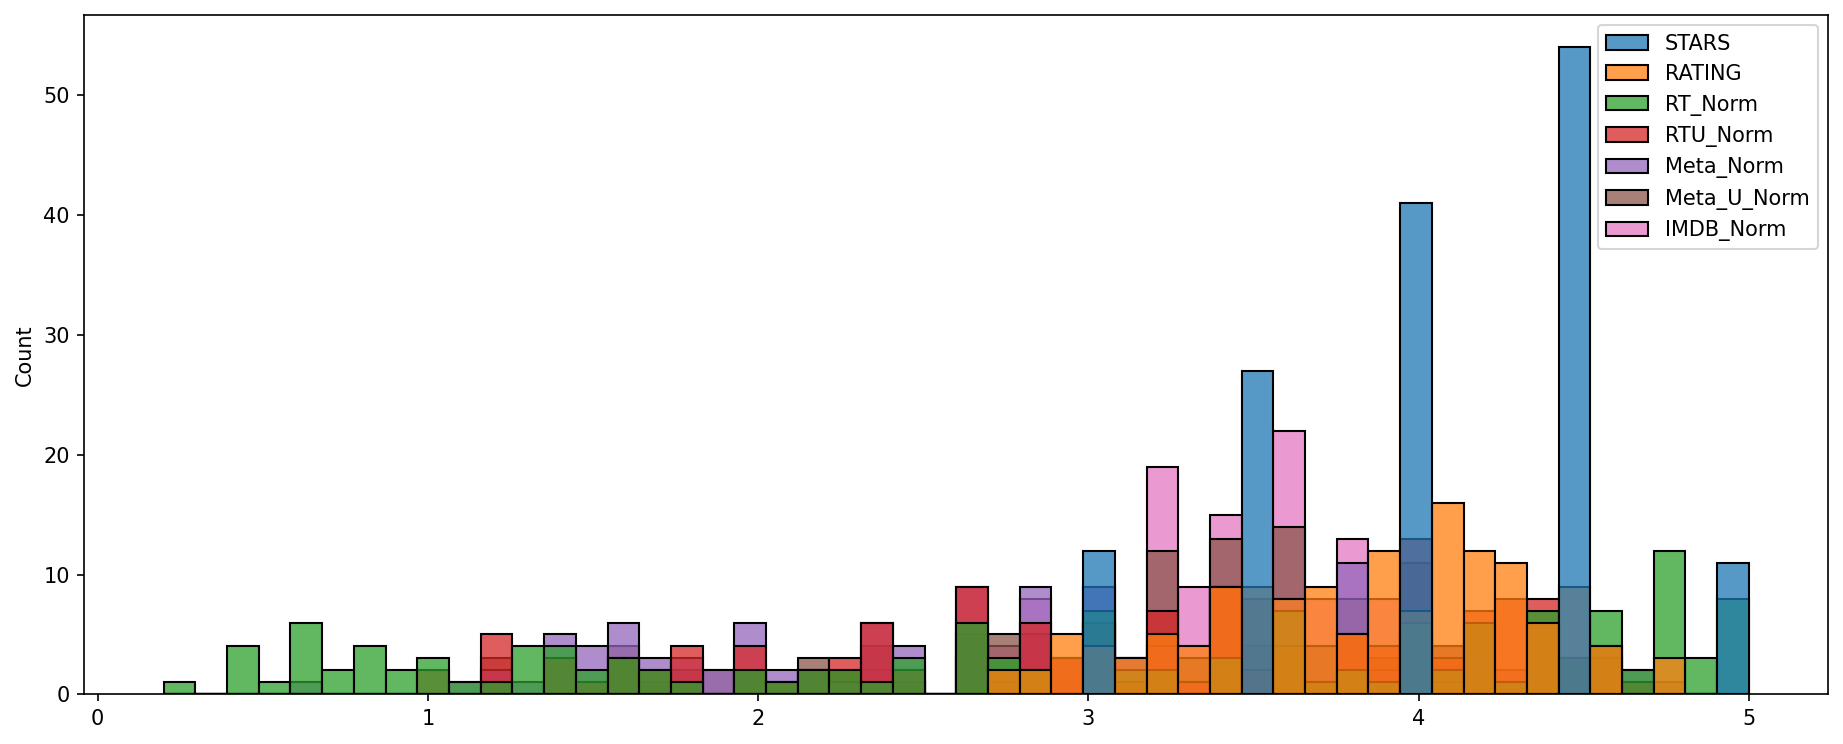


### How are the worst movies rated across all platforms?

**TASK: Create a clustermap visualization of all normalized scores. Note the differences in ratings, highly rated movies should be clustered together versus poorly rated movies. Note: This clustermap does not need to have the FILM titles as the index, feel free to drop it for the clustermap.**

In [134]:
combined_df

,FILM,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,1.25,2.10,2.30,1.60,2.10
1,Jurassic World (2015),4.5,4.5,3.55,4.05,2.95,3.50,3.65
2,American Sniper (2015),5.0,4.8,3.60,4.25,3.60,3.30,3.70
3,Furious 7 (2015),5.0,4.8,4.05,4.20,3.35,3.40,3.70
4,Inside Out (2015),4.5,4.5,4.90,4.50,4.70,4.45,4.30


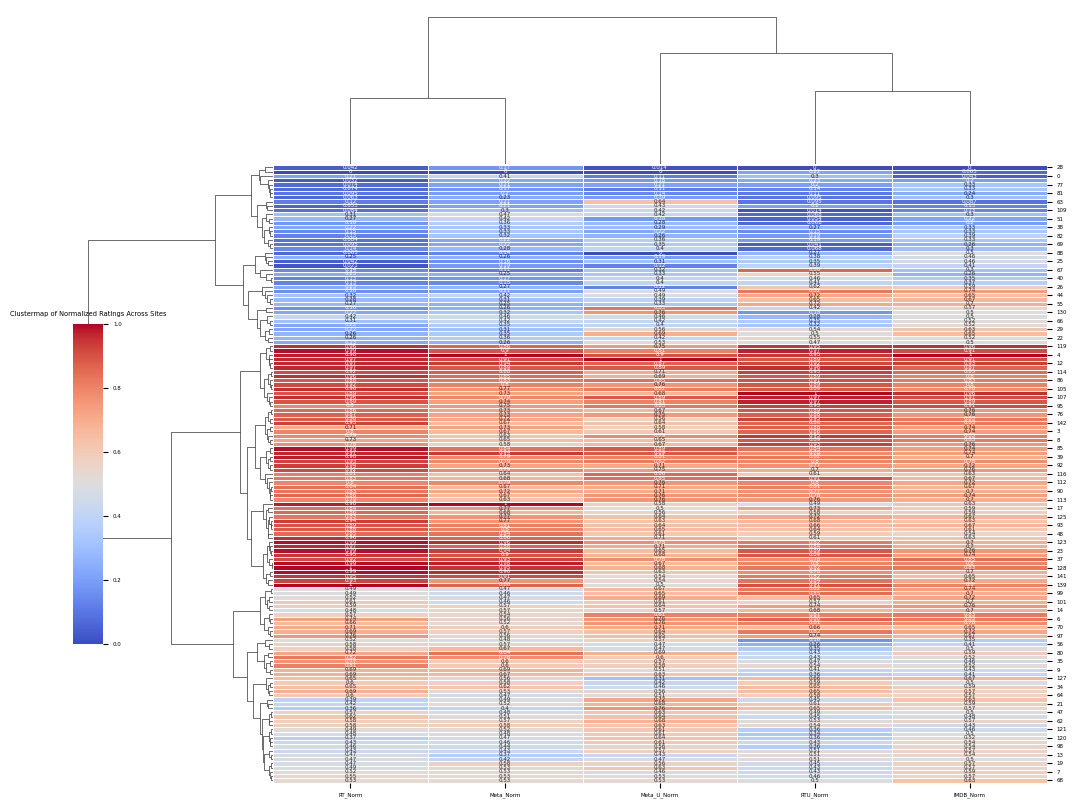

In [141]:
# CODE HERE
normalized_ratings_df = combined_df[['RT_Norm', 'RTU_Norm', 'Meta_Norm', 'Meta_U_Norm', 'IMDB_Norm']]

# Create the clustermap
sns.clustermap(normalized_ratings_df,
               method='ward',           # Clustering method
               metric='euclidean',      # Distance metric
               cmap='coolwarm',         # Color map to show the ratings
               figsize=(10, 8),         # Size of the plot
               standard_scale=1,        # Standardize the data along rows (normalize ratings across sites)
               linewidths=0.5,          # Line width of the grid
               annot=True,              # Annotate the values in the heatmap
               cbar_pos=(0, .2, .03, .4))  # Position of colorbar

# Add a title
plt.title('Clustermap of Normalized Ratings Across Sites')

# Display the plot
plt.show()

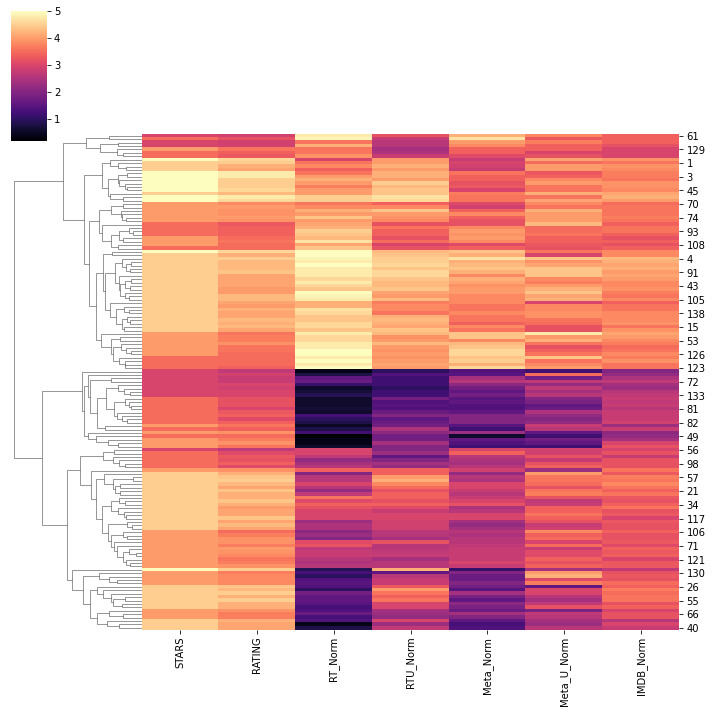

**TASK: Clearly Fandango is rating movies much higher than other sites, especially considering that it is then displaying a rounded up version of the rating. Let's examine the top 10 worst movies. Based off the Rotten Tomatoes Critic Ratings, what are the top 10 lowest rated movies? What are the normalized scores across all platforms for these movies? You may need to add the FILM column back in to your DataFrame of normalized scores to see the results.**

In [142]:
# CODE HERE
worst_movies = combined_df.sort_values(by='RT_Norm', ascending=True).head(10)
worst_movies


,FILM,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
49,Paul Blart: Mall Cop 2 (2015),3.5,3.5,0.25,1.80,0.65,1.20,2.15
84,Hitman: Agent 47 (2015),4.0,3.9,0.35,2.45,1.40,1.65,2.95
54,Hot Pursuit (2015),4.0,3.7,0.40,1.85,1.55,1.85,2.45
25,Taken 3 (2015),4.5,4.1,0.45,2.30,1.30,2.30,3.05
28,Fantastic Four (2015),3.0,2.7,0.45,1.00,1.35,1.25,2.00
50,The Boy Next Door (2015),4.0,3.6,0.50,1.75,1.50,2.75,2.30
88,The Loft (2015),4.0,3.6,0.55,2.00,1.20,1.20,3.15
87,Unfinished Business (2015),3.5,3.2,0.55,1.35,1.60,1.90,2.70
78,Mortdecai (2015),3.5,3.2,0.60,1.50,1.35,1.60,2.75
77,Seventh Son (2015),3.5,3.2,0.60,1.75,1.50,1.95,2.75


,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm,FILM
49,3.5,3.5,0.2,1.8,0.6,1.2,2.2,Paul Blart: Mall Cop 2 (2015)
25,4.5,4.1,0.4,2.3,1.3,2.3,3.0,Taken 3 (2015)
28,3.0,2.7,0.4,1.0,1.4,1.2,2.0,Fantastic Four (2015)
54,4.0,3.7,0.4,1.8,1.6,1.8,2.4,Hot Pursuit (2015)
84,4.0,3.9,0.4,2.4,1.4,1.6,3.0,Hitman: Agent 47 (2015)
50,4.0,3.6,0.5,1.8,1.5,2.8,2.3,The Boy Next Door (2015)
77,3.5,3.2,0.6,1.8,1.5,2.0,2.8,Seventh Son (2015)
78,3.5,3.2,0.6,1.5,1.4,1.6,2.8,Mortdecai (2015)
83,3.5,3.3,0.6,1.7,1.6,2.5,2.8,Sinister 2 (2015)
87,3.5,3.2,0.6,1.4,1.6,1.9,2.7,Unfinished Business (2015)


**FINAL TASK: Visualize the distribution of ratings across all sites for the top 10 worst movies.**

<ipython-input-155-6c6eb926d5ca>:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=worst_movies_melted, x='Rating', hue='Rating_Site', shade=True, common_norm=False, palette='muted')


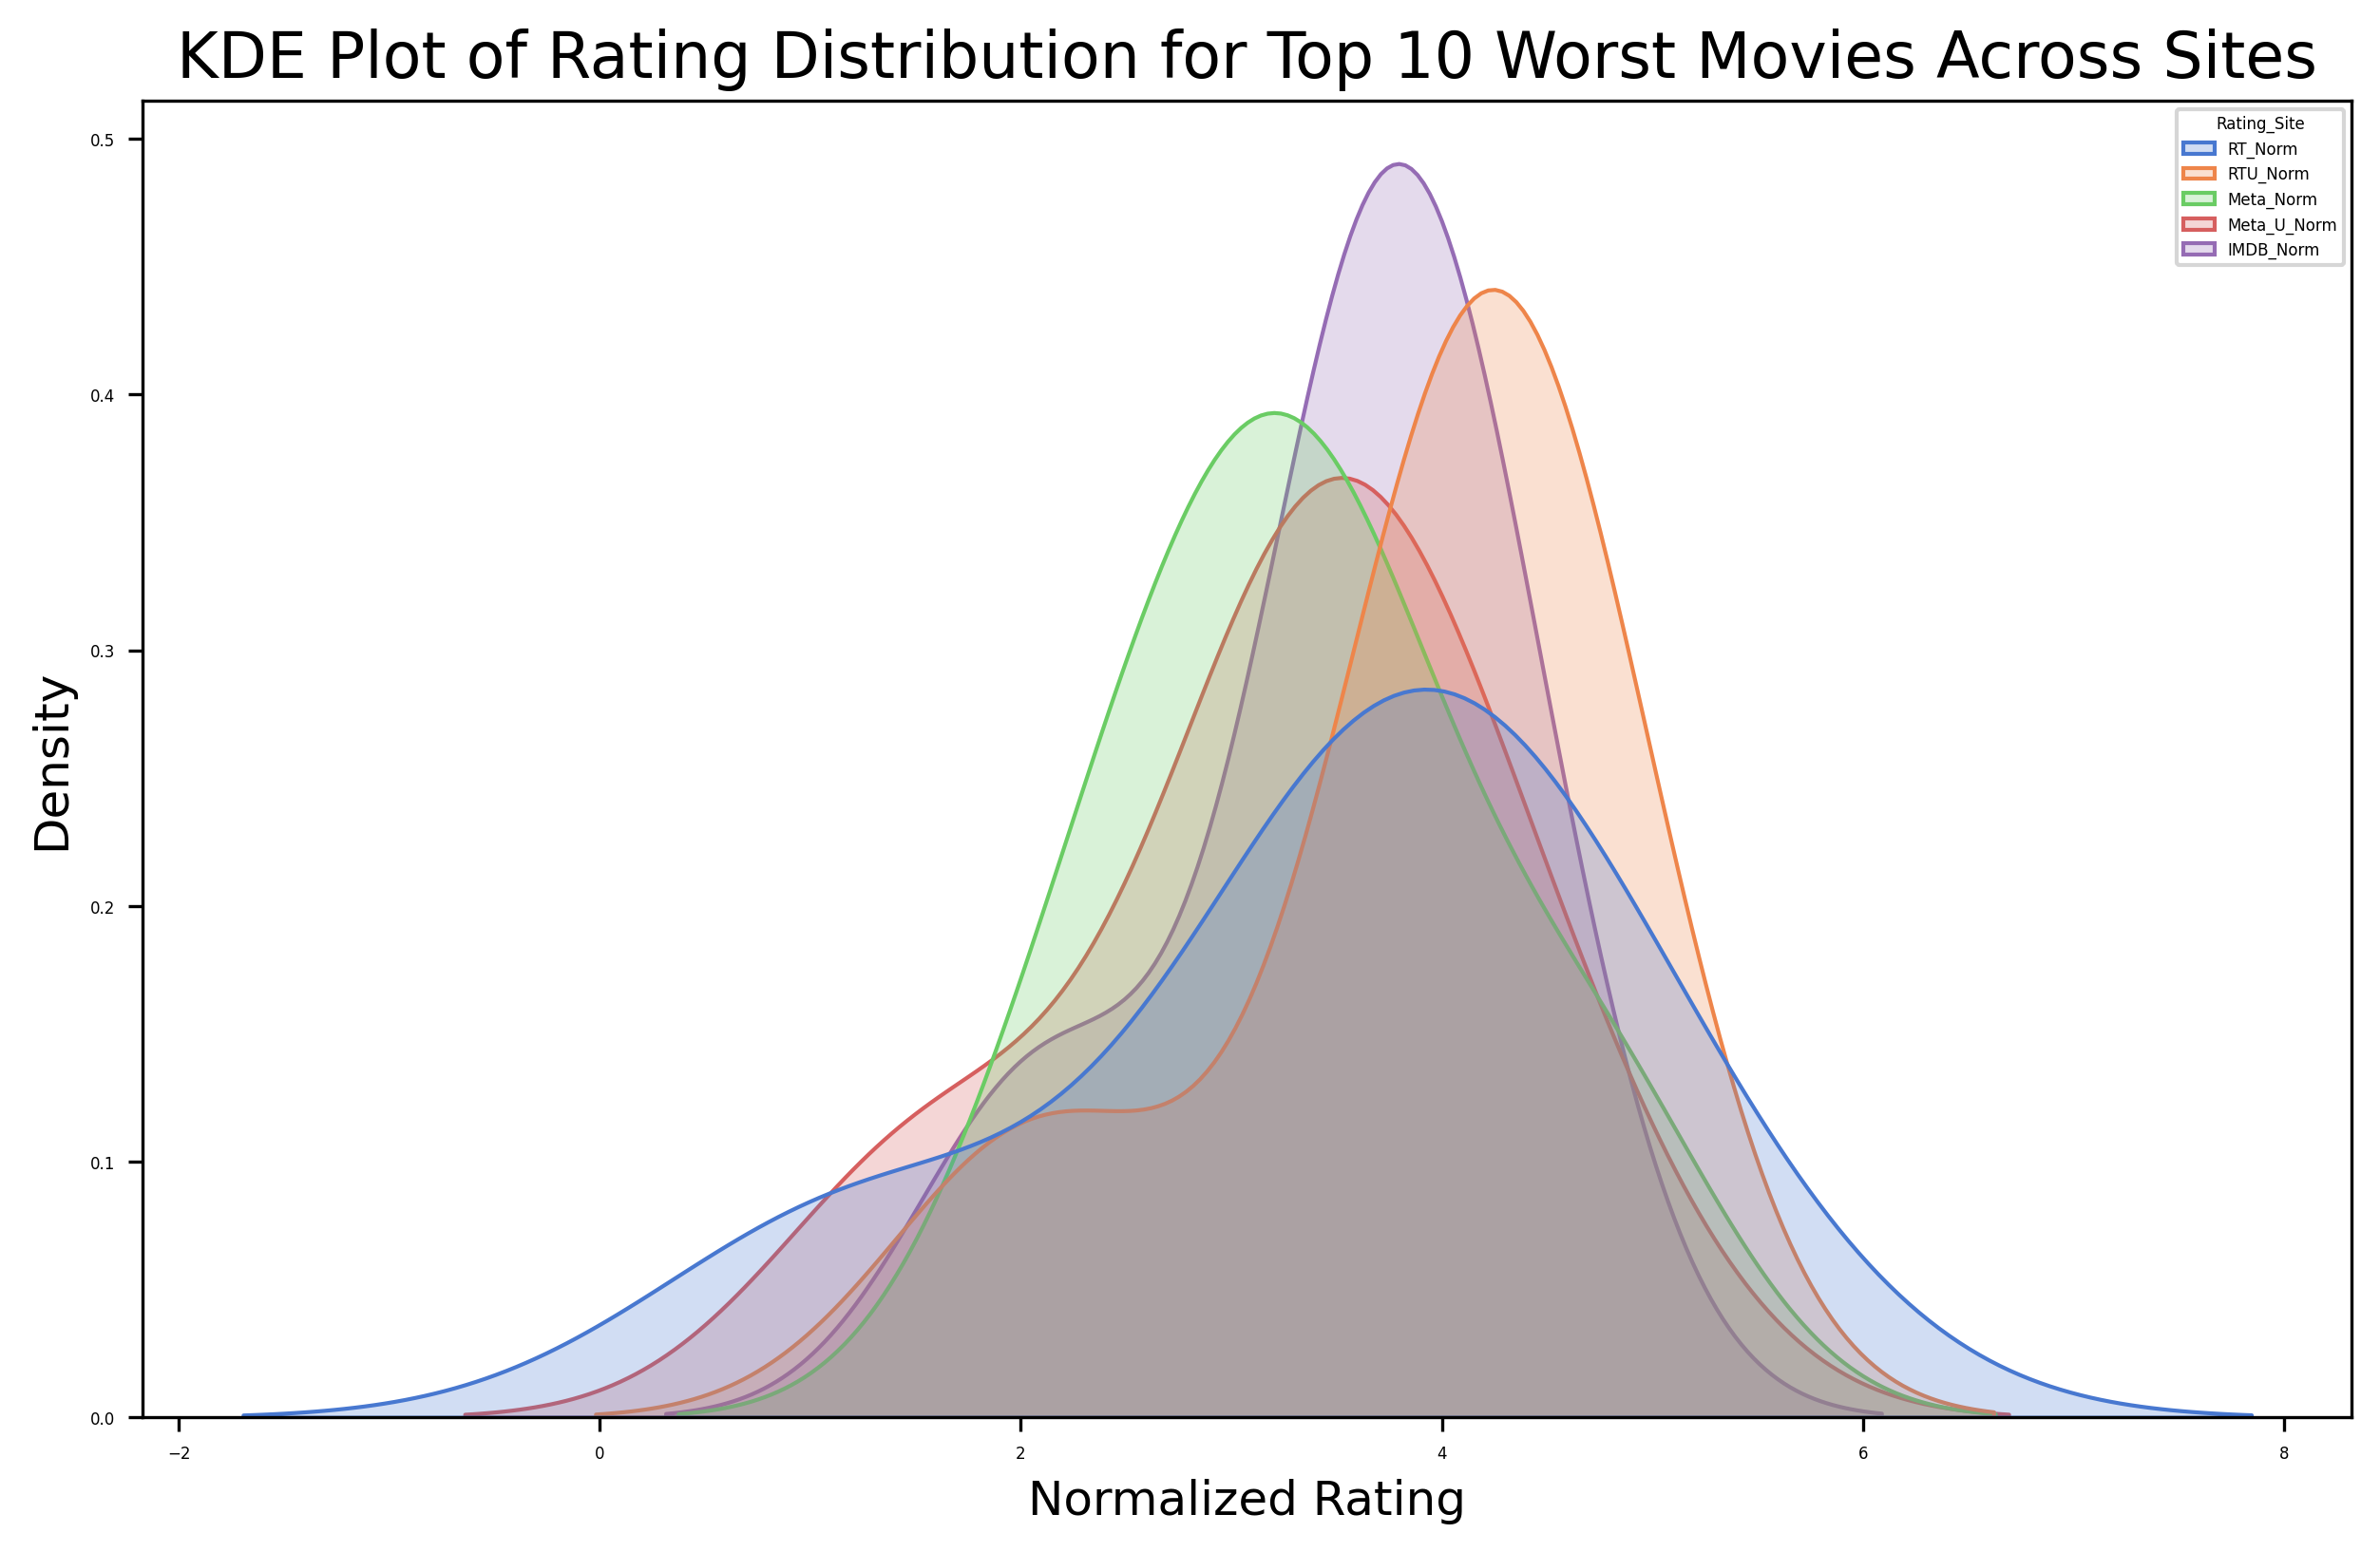

In [155]:
# CODE HERE
worst_movies = combined_df.sort_values(by='RT_Norm', ascending=True).head(10)

# Melt the dataframe to format it for Seaborn
worst_movies_melted = worst_movies.melt(id_vars=['FILM'],
                                        value_vars=['RT_Norm', 'RTU_Norm', 'Meta_Norm', 'Meta_U_Norm', 'IMDB_Norm'],
                                        var_name='Rating_Site',
                                        value_name='Rating')

# Create the KDE plot
plt.figure(figsize=(10, 6), dpi=300)

# Plot KDE for each rating site (normalized ratings across all sites for top 10 worst movies)
sns.kdeplot(data=worst_movies_melted, x='Rating', hue='Rating_Site', shade=True, common_norm=False, palette='muted')

# Add a title and labels
plt.title('KDE Plot of Rating Distribution for Top 10 Worst Movies Across Sites', fontsize=16)
plt.xlabel('Normalized Rating', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Display the plot
plt.show()

<ipython-input-156-e12e1bb16e0a>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(worst_movies['STARS'], label='STARS', shade=True, clip=(0, 5), color='blue')
<ipython-input-156-e12e1bb16e0a>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(worst_movies['RATING'], label='RATING', shade=True, clip=(0, 5), color='orange')
<ipython-input-156-e12e1bb16e0a>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(worst_movies['RT_Norm'], label='RT_Norm', shade=True, clip=(0, 5), color='green')
<ipython-input-156-e12e1bb16e0a>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an er

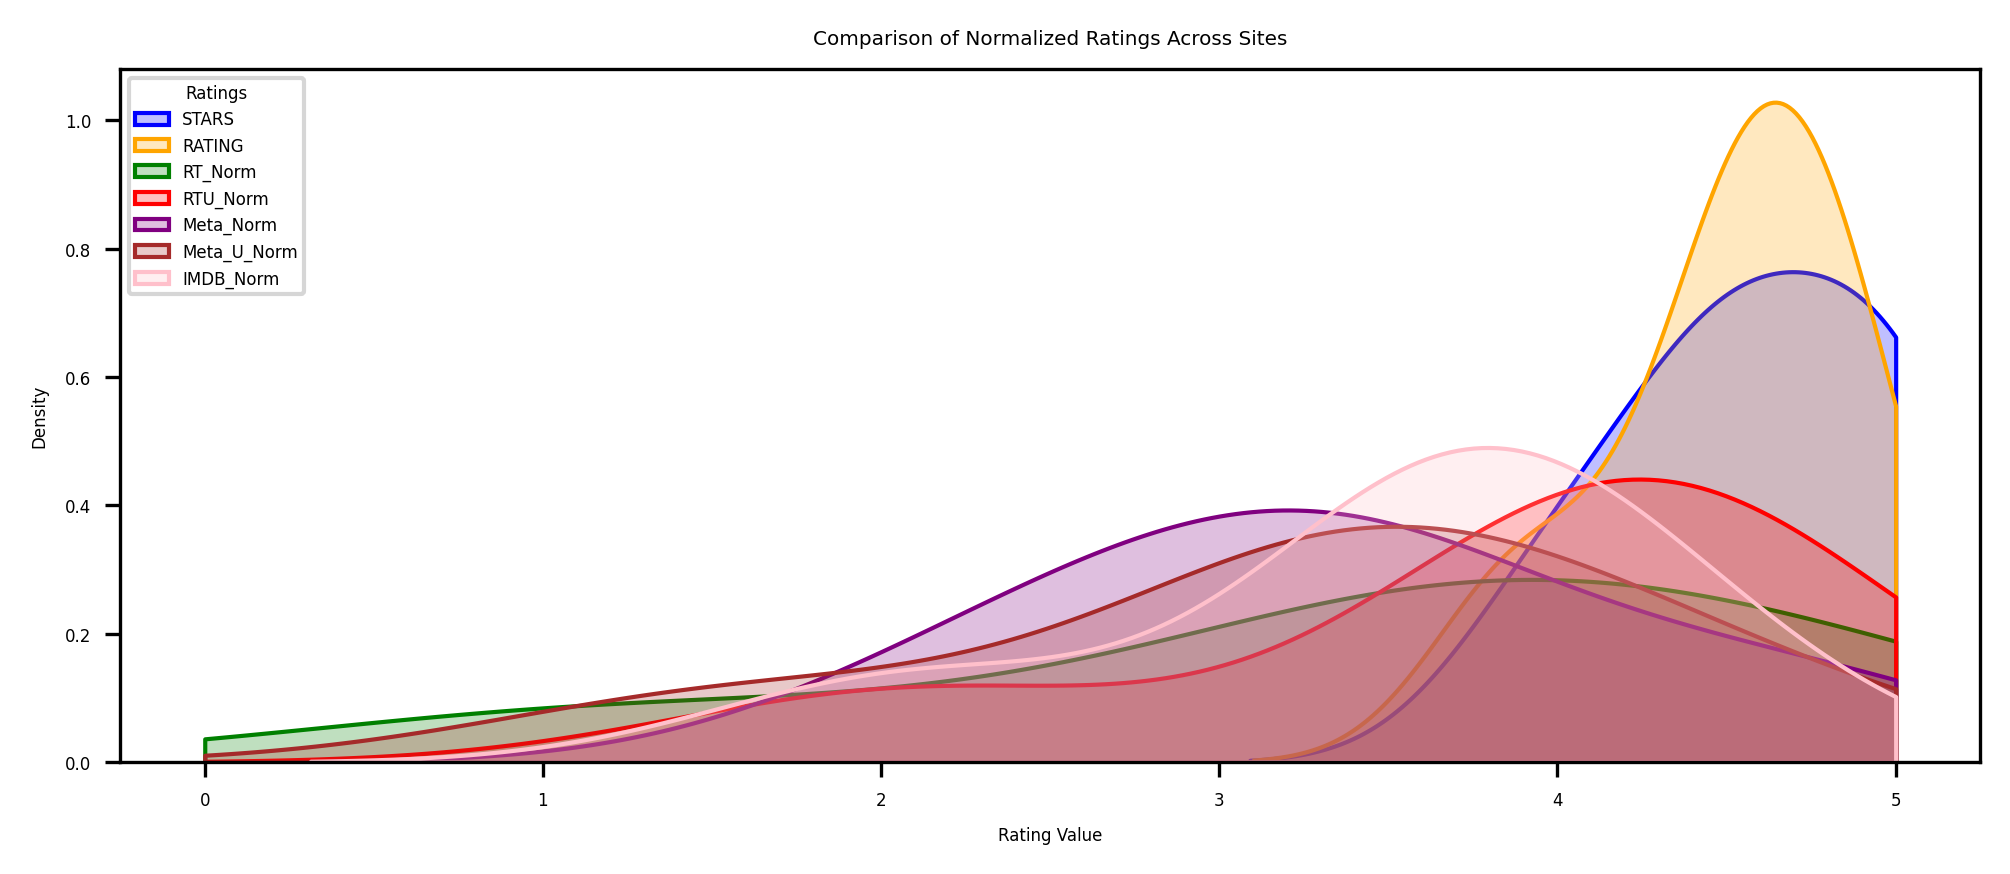

In [156]:
plt.figure(figsize=(8, 3), dpi=300)

# Plot KDE for each rating (normalized ratings across all sites)
sns.kdeplot(worst_movies['STARS'], label='STARS', shade=True, clip=(0, 5), color='blue')
sns.kdeplot(worst_movies['RATING'], label='RATING', shade=True, clip=(0, 5), color='orange')
sns.kdeplot(worst_movies['RT_Norm'], label='RT_Norm', shade=True, clip=(0, 5), color='green')
sns.kdeplot(worst_movies['RTU_Norm'], label='RTU_Norm', shade=True, clip=(0, 5), color='red')
sns.kdeplot(worst_movies['Meta_Norm'], label='Meta_Norm', shade=True, clip=(0, 5), color='purple')
sns.kdeplot(worst_movies['Meta_U_Norm'], label='Meta_U_Norm', shade=True, clip=(0, 5), color='brown')
sns.kdeplot(worst_movies['IMDB_Norm'], label='IMDB_Norm', shade=True, clip=(0, 5), color='pink')

# Add a legend to the plot
plt.legend(title='Ratings', loc='upper left')

# Add titles and labels
plt.title('Comparison of Normalized Ratings Across Sites')
plt.xlabel('Rating Value')
plt.ylabel('Density')

# Display the plot
plt.show()

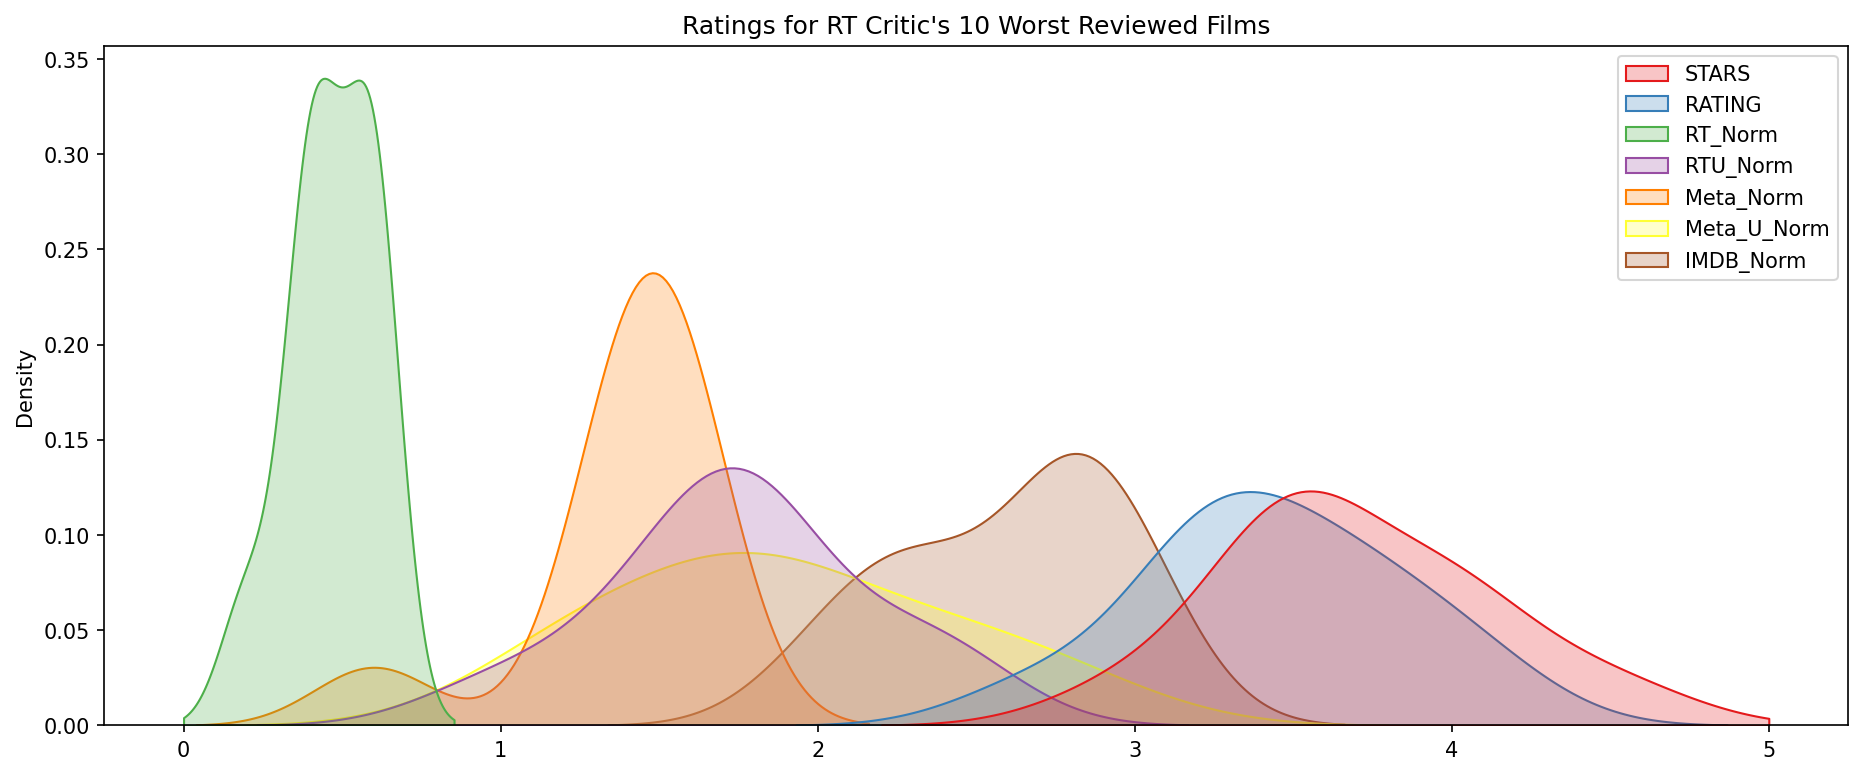

---
----

<img src="https://upload.wikimedia.org/wikipedia/en/6/6f/Taken_3_poster.jpg">

**Final thoughts: Wow! Fandango is showing around 3-4 star ratings for films that are clearly bad! Notice the biggest offender, [Taken 3!](https://www.youtube.com/watch?v=tJrfImRCHJ0). Fandango is displaying 4.5 stars on their site for a film with an [average rating of 1.86](https://en.wikipedia.org/wiki/Taken_3#Critical_response) across the other platforms!**

In [153]:
a = 0.4 +	2.3 +	1.3 +	2.3 	+3.0

In [154]:
a/5

1.86

In [152]:
0.4+2.3+1.3+2.3+3

9.3

In [ ]:
9.3/5

1.86

----